### TP2 : La chasse au papyrus

  Internet regorge de bases de données intéressantes, surtout pour les linguistes et les humanités numériques. En effet, ils mettent souvent en ligne des bases de données spécialisées permettant (gratuitement ou non) d'explorer une collection particulière. Si la base de donnée est hébergée sur le site et naviguable, on ne peut malheureusement pas en faire une exploration quantitative puisque les sites n'offrent pas l'option de télécharger l'ensemble des données. De plus on est pas forcément intéressé par toute la collection ni par toutes les métadonnées disponibles pour chaque document.


Heureusement, python est là pour nous aider !



L'objectif de ce TP est de collecter, stocker et analyser une collection de papyri grecs. Ce sera l'occasion de voir comment on peut utiliser les librairies de data science actuelles pour observer et analyser un dataset original

**Objectifs :**

1) Réviser les techniques de web scraping pour voir comment collecter un dataset:
* déduire la structure des url à regarder
* télécharger les pages HTML
* regarder la structure de la page et utiliser un parser HTML pour extraire les données

2) stocker les données sous un format csv. Utiliser pandas pour les analyser

3) construire des visualisations intéressantes du dataset

4) gérer le texte grec, son encodage, les outils TAL pour le traiter

5) utiliser streamlit, une librairie intuitive pour créer un front permettant d'explorer la collection de papyri.


Le rendu prendra la forme d'une archive contenant 3 fichiers .py ainsi qu'un fichier requirements.txt

# I) Web scraping et collecte de la base de données des papyrus. /6

L'objectif de ce TP est d'analyser une collection de papyri grecs particulière.

Nous nous intéresserons à une partie de la collection préservée sur le site trismegistos.

https://www.trismegistos.org/

Nous ne nous intéresserong qu'à un nombre limité de papyri dont la liste est fournie en annexe (fichier papyrus_metadata.csv)



# 1) Collecte des URL

 A partir de la liste des papyri à étudier, générez la liste des url à crawler. Pour cela parcourez le site pour comprendre la structure des url donnant accès à un papyrus.

# **Scraping**

La fonction `scrap_papyrus()` retourne un JSON contenant les informations suivantes sur le papyrus:</br>

✅ Language</br>
✅ Content</br>
✅ Date</br>
✅ Provenance</br>
✅ Material</br>
✅ Archive</br>
✅ Collections</br>
✅ Publications</br>
✅ Le texte grec formaté</br>
✅ La liste des noms de personnes</br>
✅ La liste des noms de lieux</br>
✅ La liste des irrégularités textuelles</br>

Plus précisément :
```python
            item_data = {
                "Language": None,
                "Content": None,
                "Date": None,
                "Provenance": None,
                "Material": None,
                "Archive": [],
                "Collections": [],
                "Publications": [],
                "GreekText": None,
                "People": [],
                "Places": [],
                "Irregularities": []
            }
```



[<img src="https://img.icons8.com/material-outlined/24/000000/download--v1.png"/> **Téléchargez le fichier py pour faire le scrapping**](https://raw.githubusercontent.com/GwenTsang/Papyri/refs/heads/main/scrapping/scrapapyrus.py)


[<img src="https://img.icons8.com/material-outlined/24/000000/download--v1.png"/> **Téléchargez le JSON contenant les métadonnées de 10 pages scrappées**](https://github.com/GwenTsang/Papyri/blob/main/data/trismegistos_data_papyrus_1-10-full.json)


# II) Analyse du dataset



Dans cette partie, nous allons utiliser les librairies de datascience pour visualiser, analyser et enrichir le corpus que nous avons scrapé

In [2]:
!wget https://raw.githubusercontent.com/Dinarque/INALCO_Techniques_web_en_python_2025/refs/heads/main/TP/papyrus_corpus.csv -q

# 4) Chargement et nettoyage du dataset

* **Charger le fichier csv dans un DataFrame**


In [4]:
import pandas as pd
df = pd.read_csv("/content/papyrus_corpus.csv")

* Afficher les 4 premières lignes

In [ ]:
df.head(4)

,ID,Authors / works,Book form,Content (beta!),Culture & genre,Date,Full Text,Language/script,Material,Note,People List,Places List,Provenance,Recto/Verso,Reuse note,Reuse type,Ro,Text Irregularities
0,TM 58376,NaN,NaN,funerary (human),NaN,3rd century BC: BC 299 - 200,NaN,Hieroglyphic,stone— stele,NaN,"['Ns-Ḥr', 'Psḏ.t', 'Twtw', 'Subscribe to expor...",{},Panopolis (Akhmim)- Egypt (9th Upper Egyptian ...,NaN,NaN,NaN,NaN,[]
1,TM 61011,"Homerus,Ilias:2.379-2.382This link will bring ...",codex (10 pages); columns per page: 2; highest...,school text?,"literature, science — poetry, epic + philology...",late 4th - early 5th century AD: AD 375 - 425,NaN,Greek(paleography: documentary hand),papyrus,school text (Fournet),['\r\n \t\t\t\t\tWe currently do not ha...,{},Aphrodito (Kom Ishgau)- Egypt (10th Upper Egyp...,Ro/Vo,NaN,NaN,NaN,[]
2,TM 61596,"Menander,Heros: hypothesis and title (epitomiz...",codex (17 fol.); columns per page: 1; highest ...,NaN,"literature, science — poetry, tragedy + philol...",5th century AD: AD 400 - 499,NaN,Greek(paleography: pointed majuscule sloping),papyrus,reused as a jar stopper,['\r\n \t\t\t\t\tWe currently do not ha...,{},Aphrodito (Kom Ishgau)- Egypt (10th Upper Egyp...,Ro/Vo,NaN,NaN,NaN,[]
3,TM 61072,"Homerus,Ilias:2.494-2.519This link will bring ...",codex; columns per page: 1; number of lines pe...,school text,"literature — poetry, epic (religion: classical)",late 5th - early 6th century AD: AD 475 - 525,NaN,Greek,NaN,school text (Fournet),['\r\n \t\t\t\t\tWe currently do not ha...,{},Aphrodito (Kom Ishgau)- Egypt (10th Upper Egyp...,Ro/Vo,NaN,NaN,NaN,[]


* **Combien de textes n'ont pas été capturés pendant le scraping ?**


In [ ]:
# Compter le nombre de cellules contenant "nan" dans la colonne 'Full Text'

# Pour compter les vraies valeurs manquantes (NaN) :
count_nan = df["Full Text"].isna().sum()

print(f"Nombre de cellules manquantes dans la colonne 'Full Text': {count_nan}")
print(f"Si on les enlève, il restera {len(df) - count_nan} papyri clean")

Nombre de cellules manquantes dans la colonne 'Full Text': 120
Si on les enlève, il restera 459 papyri clean


* **Enlevez les papyri qui n'ont pas été récupérés pendant le scrapping.**


In [ ]:
# Définition de la fonction
def clean_dataset(file_path: str) -> pd.DataFrame:
    df = pd.read_csv(file_path)

    # Supprimer les textes manquants
    df = df.dropna(subset=['Full Text']) # Avec la fonction dropna on drop les nan

    return df

print(f"Il reste bien {len(clean_dataset("/content/papyrus_corpus.csv"))} papyri ")

Il reste bien 459 papyri 


 **On vient d'enlever les cellules avec "nan". C'est bien. Mais est-ce suffisant ?**</br>
 </br>
⚠️ **Non : une inspection plus approfondie révèle que ce nettoyage est imparfait** ⚠️</br>

</br>

**Avec une regex on peut trouver encore trois éléments suspects supplémentaires dans la colonne 'Full Text'**

In [10]:
# Regex définissant les caractères grecs
# \u0370-\u03FF : Grec et Copte
# \u1F00-\u1FFF : Grec étendu (polytonique)
# \u0300-\u036F : Diacritiques combinants

greek_regex = r"[\u0370-\u03FF\u1F00-\u1FFF\u0300-\u036F]"

# Filtre basé sur 'nan'
# 1. notna() : Pas null (NaN réel)
# 2. astype(str).str.strip() != "" : Pas vide après nettoyage
# 3. str.contains("nan") : Ne contient pas le texte littéral "nan"
filter_valid_text = (
    df["Full Text"].notna() &
    (df["Full Text"].astype(str).str.strip() != "") &
    ~df["Full Text"].astype(str).str.lower().str.contains("nan", regex=False)
)

# Définition du filtre "Grec"
# na=False assure que si une valeur est NaN, elle est comptée comme False (pas de grec)
filter_has_greek = df["Full Text"].astype(str).str.contains(greek_regex, regex=True, na=False)

# La différence : Lignes valides (texte) MAIS sans grec
diff_df = df[filter_valid_text & ~filter_has_greek]

print(f"Nombre de lignes du DataFrame en enlevant tous les 'nan' : {len(df[filter_valid_text])}")
print(f"Lignes contenant du grec : {len(df[filter_valid_text & filter_has_greek])}")
print(f"Différence : {len(diff_df)}")
print(f"\n")
print("Les trois lignes incriminées (qui n'ont pas de grec ET pas de 'nan') sont les suivantes :")

for text in diff_df["Full Text"].head(3):
     print(text)

Nombre de lignes du DataFrame en enlevant tous les 'nan' : 459
Lignes contenant du grec : 456
Différence : 3


Les trois lignes incriminées (qui n'ont pas de grec ET pas de 'nan') sont les suivantes :
1 |gap=6_lines|
1 |gap=3_lines|
1 [--------------------]  |gap=2_lines|


#### **First cleaning**

On retire les 123 lignes pour lesquelles le contenu de la cellule "Full Text" n'est pas propre dans un nouveau CSV

In [12]:
import pandas as pd
import os

# Assuming 'df' and 'greek_regex' are already defined

filter_valid_text = (
    df["Full Text"].notna() &
    (df["Full Text"].astype(str).str.strip() != "") &
    ~df["Full Text"].astype(str).str.lower().str.contains("nan")
)

# na=False ensures that NaN values are treated as False instead of causing errors
filter_has_greek = df["Full Text"].astype(str).str.contains(greek_regex, regex=True, na=False)

# On ne garde que ce qui est valide ET contient du grec
df = df[filter_valid_text & filter_has_greek]

output_path = "/content/papyrus_corpus.csv".replace(".csv", "_cleaned.csv")
# index=False avoids writing the row numbers to the CSV
df.to_csv(output_path, index=False)

print(f"Nouveau fichier : /content/papyrus_corpus_cleaned.csv")

Nouveau fichier : /content/papyrus_corpus_cleaned.csv


**Remarque** : pour quelques papyri, le langage était indiqué comme étant "Coptic" ou "Hieroglyphic" dans le jeu de donnée brut originel :

In [17]:
df = pd.read_csv('/content/papyrus_corpus.csv')

languages = (
    df['Language/script']
    .dropna()
    .str.replace(r'\(.*?\)', '', regex=True)
    .str.strip()
    .str.split().str[0]
    .unique()
    .tolist()
)

print(languages)

['Greek']


Or, à présent, il ne reste plus que des éléments dont le langage est étiquetté "Greek". Mais à vrai dire dans le dataset brut, il y avait *très peu* d'éléments "Coptic" et "Hieroglyphic"

In [ ]:
df = pd.read_csv('/content/papyrus_corpus_cleaned.csv')

language = (
    df['Language/script']
    .dropna()
    .str.replace(r'\(.*?\)', '', regex=True)
    .str.strip()
    .str.split().str[0]
    .unique()[0]
)

print(language)

Greek



* **Trier la collection selon l'ID (ordre croissant)**

In [19]:
import pandas as pd

df = pd.read_csv("/content/papyrus_corpus_cleaned.csv")

# Sorting the DataFrame
df = df.sort_values(
    by="ID",
    key=lambda x: x.str.replace("TM ", "", regex=False).astype(int)
)

# 5) Etude de corpus : genre, lieu et date



**Quelles sont les différents genre de texte que l'on a collecté ?**

In [ ]:
import pandas as pd
df = pd.read_csv('/content/papyrus_corpus.csv')
genres_uniques = df["Content (beta!)"].unique()
print(genres_uniques)

['funerary (human)' 'school text?' nan 'school text' 'Contract: sale'
 'Receipt' 'List' 'Account'
 'LetterSee also TM Letters TOP SS6 (1formula).' 'Contract: testament'
 'Contract: lease' 'Contract: loan'
 'LetterSee also TM Letters TOP SS6 (2formulae).' 'Letter'
 'LetterSee also TM Letters TOP SS6 (3formulae).' 'Commonitorium'
 'LetterSee also TM Letters TOP SS6 (4formulae).' 'Contract'
 'Fragment of a loan contract' 'Contract: marriage / divorce'
 'Other: fragment' 'Account: private' 'Fragment of a letter' 'Petition'
 'Contract: division' 'fragment'
 'Letter: officialSee also TM Letters TOP SS6 (1formula).'
 'Receipt: taxes' 'Duplicate of a reprimand'
 'Fragment anépigraphe / unbestimmbar' 'Fragment of a contract'
 'Fourteen fragments of a register of accounts'
 'Two fragments of a document (context uncertain)' 'Account: taxes'
 'fragment of a document (unclear)' 'Bond' 'Fragment of a lease'
 'Fragment of a contract: sale of a field' 'Fragment of a letter (?)'
 'Acknowledgement of a 

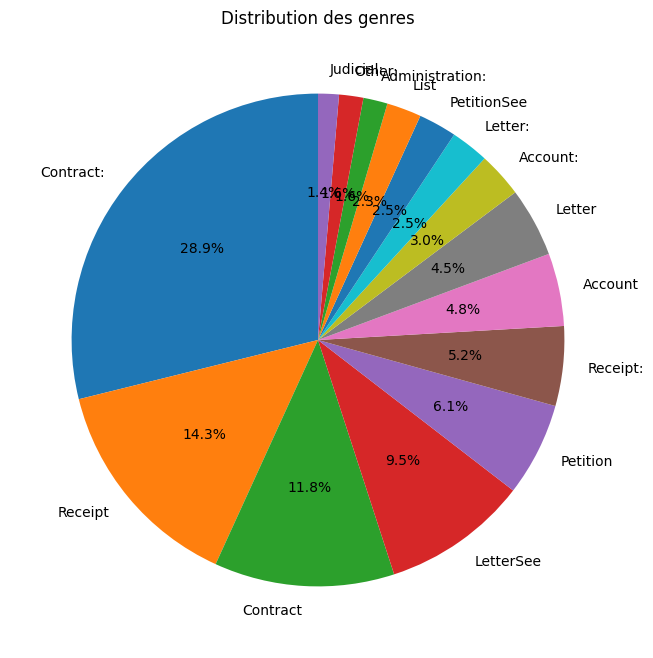

In [ ]:
import pandas as pd
from matplotlib.pyplot import subplots
from matplotlib.pyplot import show

df = pd.read_csv('/content/papyrus_corpus_cleaned.csv')

# Enlever les valeurs NaN values et spliter en espace pour récupérer le premier mot
first_words = df["Content (beta!)"].dropna().str.split().str[0]

# Compter les occurences de chaque mot
word_counts = first_words.value_counts()

# Limitation à 10 catégories (en supprimant les autres dans le calcul)
word_counts = word_counts.head(15)

# Création du pie chart
fig, ax = subplots(figsize=(10, 8))
ax.pie(word_counts.values, labels=word_counts.index, autopct='%1.1f%%', startangle=90)
ax.set_title('Distribution des genres')

# Affichage du chart
show()

* **D'où viennent les papyri ?  De même ne retenez que le nom de la ville. Faites un diagramme en barre .**

In [ ]:
# Inspecter le contenu de la colonne "Provenance" sous forme de liste

print(df["Provenance"].dropna().str.split().str[0].to_list())

['Aphrodito', 'Antaiopolis', 'Aphrodito', 'Aphrodito', 'Aphrodito', 'Aphrodito', 'Aphrodito', 'Antinoopolis', 'Aphrodito', 'Aphrodito', 'Aphrodito', 'Antaiopolis', 'Tanyaithis?', 'Aphrodito', 'Aphrodito', 'Aphrodito', 'Antaiopolites?', 'Aphrodito', 'Aphrodito', 'Aphrodito', 'Aphrodito', 'Aphrodito', 'Aphrodito', 'Antinoopolis', 'Aphrodito', 'Aphrodito', 'Aphrodito', 'Aphrodito', 'Aphrodito', 'Aphrodito', 'Aphrodito', 'Aphrodito', 'Aphrodito', 'Aphrodito', 'Aphrodito', 'Aphrodito', 'Aphrodito', 'Aphrodito', 'Aphrodito', 'Ibion?', 'Aphrodito', 'Aphrodito', 'Aphrodito', 'Aphrodito', 'Aphrodito', 'Antaiopolis', 'Aphrodito', 'Aphrodito', 'Aphrodito', 'Aphrodito', 'Aphrodito', 'Aphrodito', 'Aphrodito', 'Aphrodito', 'Antinoopolis', 'Aphrodito', 'Aphrodito', 'Aphrodito', 'Aphrodito', 'Aphrodito', 'Antaiopolis', 'Arabon', 'Aphrodito', 'Antaiopolis', 'Aphrodito', 'Aphrodito', 'Aphrodito', 'Aphrodito', 'Antinoopolis', 'Aphrodito', 'Antinoopolis', 'Antinoopolis', 'Antinoopolis', 'Antinoopolis', 'A

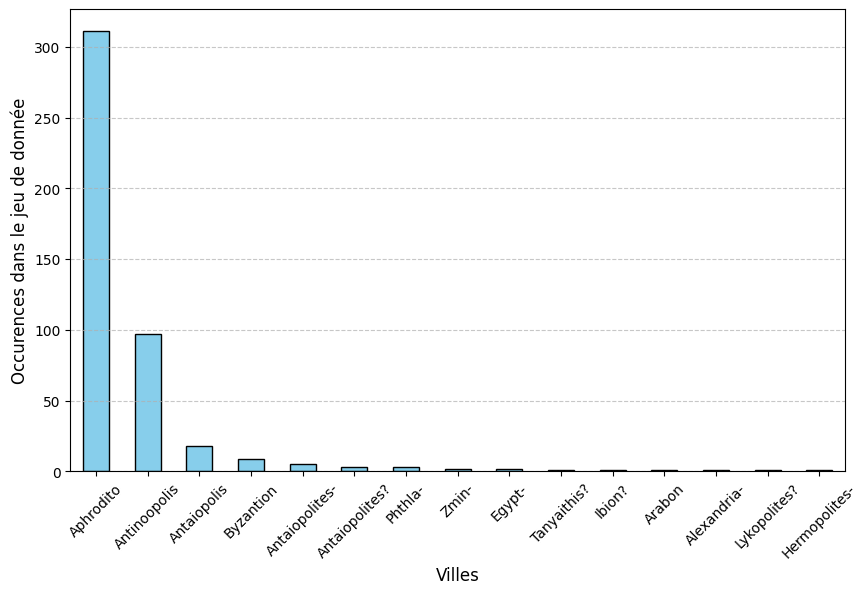

In [ ]:
import matplotlib.pyplot as plt

cities = df["Provenance"].dropna().str.split().str[0]

city_counts = cities.value_counts()

plt.figure(figsize=(10, 6))
city_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel('Villes', fontsize=12)
plt.ylabel('Occurences dans le jeu de donnée', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

**Réponse** : La majorité des papyri proviennent d'Aphrodito

In [ ]:
# Inspecter le contenu de la colonne "Date"
print(df["Date"].head(10).to_string(index=False))

                      AD 490 - 565
      AD 507 Mar 21?AD 492 Mar 21?
      6th century AD: AD 500 - 599
      6th century AD: AD 500 - 599
      6th century AD: AD 500 - 599
      6th century AD: AD 500 - 599
      6th century AD: AD 500 - 599
early 6th century AD: AD 500 - 525
      6th century AD: AD 500 - 599
early 6th century AD: AD 500 - 525




* **Formattez les dates sous le format d'une date simple AD xxx ou d'un intervalle AD xxx - xxx**




En python, `range` ne définit pas un intervalle continu, mais une suite discrète de valeurs entières.

Mais il faut obtenir un graphique qui “semble continu". Pour cela, on utilise `sns.kdeplot` qui permet de donner une ***estimation lisse*** de la distribution.

In [ ]:
import seaborn as sns
import re

def extract_years(date_str: str):
    """Extraire les années sous forme de plage, en traitant à la fois les dates après et avant J.-C."""
    match_range_ad = re.search(r'AD (\d+)\s*-\s*(\d+)', date_str) # AC = After Christ, après l'an 0
    match_single_ad = re.search(r'AD (\d+)', date_str)
    match_range_bc = re.search(r'BC (\d+)\s*-\s*(\d+)', date_str) # BC = Before Christ, avant l'an 0
    match_single_bc = re.search(r'BC (\d+)', date_str)

    if match_range_ad:
        return range(int(match_range_ad.group(1)), int(match_range_ad.group(2)) + 1)
    elif match_single_ad:
        year = int(match_single_ad.group(1))
        return range(year, year + 1)
    elif match_range_bc:
        return range(-int(match_range_bc.group(1)), -int(match_range_bc.group(2)) - 1, -1)
    elif match_single_bc:
        year = -int(match_single_bc.group(1))
        return range(year, year + 1)

    return


def cleaned_date(date_text: str) -> str:
    """Formattage des dates"""
    match = re.search(r'(AD|BC)\s*(\d+)(?:\s*[A-Za-z]+\s*\d*)?\s*-\s*(\d+)', date_text)
    if match:
        era, start_year, end_year = match.groups()
        return f"{era} {start_year} - {end_year}"

    match_single = re.search(r'(AD|BC)\s*(\d+)', date_text)
    if match_single:
        era, year = match_single.groups()
        return f"{era} {year}"

    return date_text

def extract_date(text: str) -> str:
    """Extract the date information from the text."""
    return text.split(":")[-1].strip()

def date_analysis(df: pd.DataFrame):
    """Analyser les dates et afficher un graphique de densité des papyrus au fil du temps."""
    df['Date'] = df['Date'].apply(extract_date).apply(cleaned_date)
    years = []
    for date in df['Date'].dropna():
        year_range = extract_years(date)
        if year_range:
            years.extend(year_range)

    # Générer le graphique de densité
    plt.figure(figsize=(10, 5))
    # Ici un appel à un kernel density estimator qui permet un "lissage"
    sns.kdeplot(years, fill=True)
    plt.title("Density of Papyrus per Years")
    plt.xlabel("Years")
    plt.ylabel("Density")
    plt.xlim(min(years), max(years))
    plt.grid()
    plt.show()

* **Construire un diagramme représentant la densité de papyri sur chaque année du dataset. Quand il y a plusieurs dates mentionnées dans la colonne, ne prendre en compte que la première**


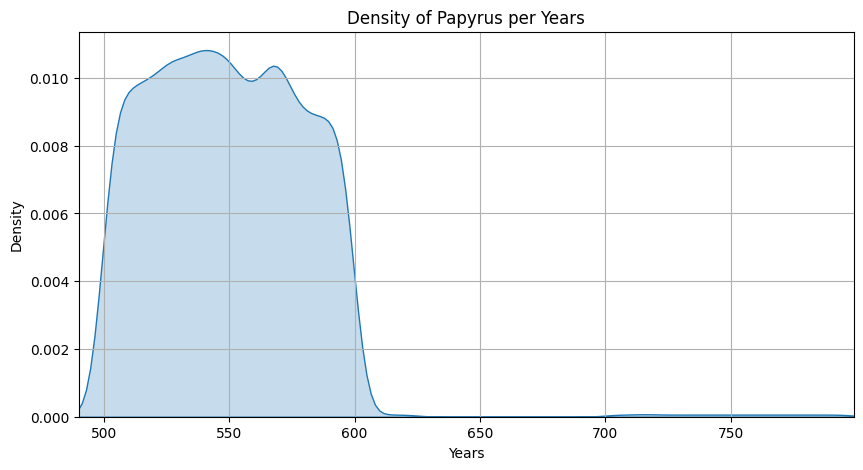

In [ ]:
date_analysis(df)

# 6) Nettoyage du texte grec

#### **Second cleaning**

On retire :
- les chiffres arabes (qui indiquaient vraissemblablement les numéros des lignes),
- les " | gap | " qui indiquent des lignes perdues,
- les caractères spéciaux "†" et "⳨".

Pour enlever les chiffres arabes on utilise `\d` qui correspond à un entier (0, 1, ..., 9)


In [16]:
df["Full Text"] = df["Full Text"].str.replace(r"\d+", "", regex=True).str.replace(r"\| gap \|", "", regex=True).str.replace(r"[†⳨]", "", regex=True)

df.to_csv("/content/papyrus_corpus.csv", index=False)

Voici la signification de certains codes en papyrologie :

 - Les petits points en dessous de certaines lettres indiquent que la lettre est défformée ou difficilement lisible,

 - Les zones entre crochets droits ou parenthèses indiquent que le texte est reconstitué par un auteur, et était illisible / détruit.



**Utilisez une regex pour extraire les contenus entre parenthèses et entre crochets**



In [ ]:
import re

text = "πεντεκαιδεκάτης  ἰνδ(ικτίονος)  κεράτια  ἑπτά  ·  γί(νεται)  [κ(εράτια)]  [ζ]  [ἁπλ(ᾶ)] , Φαμενὼθ  κε  τῆς  (αὐτῆς)  ἰνδ(ικτίονος) .  οἱ  ἐνδοδότ(ατοι)  παγ̣[ά]ρ̣χ̣(αι?)  δ̣(ιʼ)  ἐ̣μ̣ο̣(ῦ)  [..]  [ὑ]ποδέκτο(υ)  σεμ(ημείωμαι)"

uncertain_chars = re.findall(r'\[.*?\]|\(.*?\)', text)

print(uncertain_chars)

['(ικτίονος)', '(νεται)', '[κ(εράτια)]', '[ζ]', '[ἁπλ(ᾶ)]', '(αὐτῆς)', '(ικτίονος)', '(ατοι)', '[ά]', '(αι?)', '(ιʼ)', '(ῦ)', '[..]', '[ὑ]', '(υ)', '(ημείωμαι)']


**Ecrire une fonction qui prend en entrée un texte de papyrus nettoyé et renvoie la proportion de lettres incertaines dans le texte.
Cette fonction peut utiliser la regex précédente.**

</br>


In [ ]:

# Proportion de caractères incertains dans un texte papyrus nettoyé.

# uncertain_len:= caractères entre crochets [...] ou parenthèses (...), sans compter les crochets/parenthèses

# total_len: longueur totale du texte, en excluant les caractères entre crochets/parenthèses

uncertain_spans = df["Full Text"].str.findall(r"\[[^\]]*?\]|\([^)]*?\)")

# Calculer la longueur d'un texte entre crochets / entre parenthèses
# On soustrait 2 pour les délimiteurs
uncertain_len = (
    uncertain_spans
    .fillna([])  # Gérer les NaN potentiels pour éviter les erreurs dans le lambda
    .apply(lambda matches: sum(len(s) - 2 for s in matches))
)

# Calculer le dénominateur du ratio
total_len = df["Full Text"].str.len()
delimiter_count = df["Full Text"].str.count(r"[\[\]\(\)]")
denom = total_len - delimiter_count

# portion
df["Uncertain Portion"] = uncertain_len / denom

**Combien y a-t de papyrus dont plus du tiers du texte est incertain ?**

In [ ]:
count_more_than_third = int((df["Uncertain Portion"] > (1/3)).sum())
print(f"Nombre de papyrus dont plus d'un tiers est incertain : {count_more_than_third}")

Nombre de papyrus dont plus d'un tiers est incertain : 97


# 7) Identifier les noms de personnes et de lieux

* Observez le contenu des cellules de la case "people-list". Que remarquez-vous ? Réglez le(s) problème(s) de manière à ne retenir que les noms

* Utilisez le pour stocker les entités repérées dans les colonnes "People Ugarit" "Places Ugarit" et "Other Ugarit"
Commentez les résultat




In [ ]:
import pandas as pd

df = pd.read_csv('/content/papyrus_corpus.csv')
print(df.iloc[:10, 10])

0    ['Ns-Ḥr', 'Psḏ.t', 'Twtw', 'Subscribe to expor...
1    ['\r\n        \t\t\t\t\tWe currently do not ha...
2    ['\r\n        \t\t\t\t\tWe currently do not ha...
3    ['\r\n        \t\t\t\t\tWe currently do not ha...
4     [' 1Διοσκόρου', 'Subscribe to export the table']
5    [' 1Διόσκορος', 'Ψιμανωβετ', 'Subscribe to exp...
6    [' 1Ἁραοῦτος', ' 2Φοιβάμμωνι', 'Τριαδέλφου', '...
7    [' 3Ἀμμωνιανὸς', 'Διονυσοδώρου', ' 4Πάιος', 'Θ...
8    [' 5Πουῶνς', ' 7Φιλόξενον', 'Subscribe to expo...
9    [' 1Ἰωάννης', 'Παπο...', ' 19Πρῆτ', ' 20Πρῆτ',...
Name: People List, dtype: object


#### **Third cleaning**

In [20]:
#@title Nettoyage des colonnes "People List", "Full Text", "Places List"

import pandas as pd
import ast
import re
import math
from typing import Any, List

INPUT_CSV = "/content/papyrus_corpus_cleaned.csv"
OUTPUT_CSV = INPUT_CSV
COLUMNS_TO_CLEAN = ["People List", "Full Text", "Places List"]

GREEK_RE = re.compile(r"[\u0370-\u03FF\u1F00-\u1FFF\u0300-\u036F]+")


def parse_list_string(value: Any) -> List[str]:
    """Parse une valeur qui peut être une liste Python littérale ou une chaîne."""
    if value is None:
        return []
    if isinstance(value, float) and math.isnan(value):
        return []
    if isinstance(value, (list, tuple)):
        return [str(x) for x in value]

    s = str(value).strip()

    try:
        parsed = ast.literal_eval(s)
        if isinstance(parsed, (list, tuple)):
            return [str(x) for x in parsed]
    except Exception:
        pass

    items = re.findall(r'["\'](.*?)["\']', s)
    if items:
        return items

    if "," in s:
        return [x.strip() for x in s.split(",") if x.strip()]

    return []


def extract_greek(text: str) -> str:
    """Extrait tous les caractères grecs d'un texte et les normalise."""
    matches = GREEK_RE.findall(text)
    if not matches:
        return ""
    return " ".join(matches).casefold().strip()


def clean_and_filter_list(value: Any) -> str:
    """Nettoie une colonne de type liste (People List, Places List)."""
    items = parse_list_string(value)
    cleaned = []

    for item in items:
        greek = extract_greek(item)
        if greek:
            cleaned.append(greek)

    return str(cleaned)


def clean_full_text(value: Any) -> str:
    """Nettoie la colonne Full Text (texte simple)."""
    if value is None:
        return ""
    if isinstance(value, float) and math.isnan(value):
        return ""

    text = str(value)
    greek = extract_greek(text)
    return greek


def main():
    # Reading with pandas
    df = pd.read_csv(INPUT_CSV)

    # Vérifier quelles colonnes existent
    existing_cols = df.columns
    cols_to_process = [col for col in COLUMNS_TO_CLEAN if col in existing_cols]

    if not cols_to_process:
        print(f"⚠ Aucune des colonnes {COLUMNS_TO_CLEAN} n'a été trouvée dans le CSV")
        return

    # Appliquer le nettoyage approprié à chaque colonne
    for col in cols_to_process:
        if col == "Full Text":
            # Pandas .apply() works similarly to Polars .map_elements()
            df[col] = df[col].apply(clean_full_text)
        else:  # People List ou Places List
            df[col] = df[col].apply(clean_and_filter_list)

    # Writing with pandas (index=False avoids adding the row number as a column)
    df.to_csv(OUTPUT_CSV, index=False)

    print(f"✔ Fichier nettoyé écrit dans {OUTPUT_CSV}")
    print(f"✔ Lignes traitées: {len(df)}")
    print(f"✔ Colonnes nettoyées: {', '.join(cols_to_process)}")


if __name__ == "__main__":
    main()

✔ Fichier nettoyé écrit dans /content/papyrus_corpus_cleaned.csv
✔ Lignes traitées: 456
✔ Colonnes nettoyées: People List, Full Text, Places List


In [21]:
df = pd.read_csv('/content/papyrus_corpus_cleaned.csv')

# Les noms de personnes
for i in range(18):
  print(df.iloc[i, 10])

['διοσκόρου']
['διόσκοροσ', 'ψιμανωβετ']
['ἁραοῦτοσ', 'φοιβάμμωνι', 'τριαδέλφου', 'ἁραοῦτοσ', 'κωσταντῖνοσ']
['ἀμμωνιανὸσ', 'διονυσοδώρου', 'πάιοσ', 'θέωνοσ', 'ἱέραξ', 'θεοδώρου', 'ἀχιλλέωσ', 'πέτρου']
['πουῶνσ', 'φιλόξενον']
['ἰωάννησ', 'παπο', 'πρῆτ', 'πρῆτ', 'ἱέρακι', 'ἁρεώτηι']
['διόσκορον']
[]
['βησνατητ', 'σαβεῦ', 'μαρίασ', 'εὐδοξίασ']
['ἰωάννησ', 'αὐρήλιοσ χαρίσιοσ', 'ἑρμαυῶτοσ', 'αὐρήλιοσ ῥωμανὸσ', 'ἰσάκου', 'αὐρήλιοσ ἀπολλὼσ', 'διοσκόρου', 'φοιβάμμων', 'ψενθαησίου', 'βησκούιτοσ', 'ἁδριανὸσ', 'ἀβρααμίου', 'φλαύιοσ', 'ἰσακίου']
[]
['μηνᾶσ']
['φλαύιοσ ἰσίδωροσ']
['ἀπολλῶτοσ', 'διοσκόρου']
['βίκτορι', 'βίκτορι', 'ἄπα σαβουηρίου']
['χαρισίου']
['ἡρακλειανοῦ γεσίου']
['ἰωάννησ', 'φλαυι ασκ', 'ἰωάννησ', 'ἀρσένιοσ', 'φλαύιον ἀσκὸν', 'σωφρόνιον', 'ἰωάννησ', 'ἰωάννηι', 'κυριακὸσ', 'ζαχαρίαι']


In [ ]:
df['Full Text'].iloc[264]

'χμγ ὑπατείασ φλ αυίου ἰωάννου τοῦ ἐνδοξ οτάτου φαῶφι α δευτέρασ ἰνδ ι κ τίονοσ κλαυδίωι ἀπολλῶτι αἰδεσίμωι ῥιπαρίωι κώμησ ἀφροδίτησ τοῦ ἀνταιοπολίτου νομοῦ π αρὰ τῶν ἑξῆσ ὑπογραφόντων ἀπὸ τῆσ α ὐτῆσ κώμησ ἀφροδίτησ ἑκαστουσ ἐνεχομενουσ τῆι ἰδίαι ὑπογραφῆι ὁμολογοῦμεν ἐπομνύμενοι τόν τε παντοκράτορα θεὸν καὶ τὴν νίκην καὶ διαμονὴν τοῦ δεσπότου ἡμῶν φλ αυίου ἰουστινιανοῦ τοῦ αἰωνίου αὐγούστου αὐτοκράτοροσ ἐγγυᾶσθαι καὶ ἀναδεδέχθαι ἄπα πὼκ ἀβρααμίου ἐκ μη τρὸσ ἀποστολίασ ἀπὸ τῆσ α ὐτῆσ κώμησ ἐπὶ τῶι αὐτὸν παραμεῖναι ἐν τῆι αὐτῆι κώμηι καὶ μὴ εὑρεθῆναι κατ αὐτὸν γενάμενον οἱωιδήποτε συναλάγματι φανῆναι κ̣αὶ κρυ̣φίαι ἢ πλαστῆι ἢ οἱωιδήποτε σωλυτ̣ω ἢ σφάλματι ἀπρεπέσ ὁπόταν δὲ ζητουμενον παρὰ τῆσ ὑ μῶν ἐντρεχείασ τοῦτο ν παρενεγκεῖν καὶ παραδώσομεν ὑμῖν̣ ἐν δημοσίωι τόπωι ἐκτὸσ ἁγίων περιβόλων καὶ θείων χαρακτήρων καὶ ἁγίασ κυριακῆσ ἐν τω παρειλήφαμεν σχήματι εἰ δ̣ὲ μὴ τοῦτο ποιήσειεν ἑτοίμωσ ἔχομεν οἱ ἐγγυηταὶ παρασχεῖν ὑμῖν χρυσοῦ νομίσματα δώ δε

In [22]:
# Textes

import pandas as pd
df = pd.read_csv('/content/papyrus_corpus.csv')

pd.set_option('display.max_colwidth', 500)
print(df['Full Text'].head(10))

0     [--------------------]  [.....]  [Διοσκ]ό̣ρου̣  ε̣[---]  [ὁρμωμένου]  [μὲν]  [ἀπὸ]  [κώμης]  [---]  [τοῦ]  [---]  [νομοῦ]  [,]  δ̣[ιάγον]τος  δὲ  τὰ  νῦ[ν]  ἐν  τ[αύτῃ]  [---]  [ὁμολογῶ]  [διὰ]  [ταύτης]  [μου]  [τῆς]  ἐγ̣[γρά]φου  ἀσφαλε̣ί̣ας  η̣[---]  ἀν̣[απο]τρέπτῳ  γνώμῃ  τε  κ[αὶ]  σ[υναιρέσει]  [,]  [---]  [ἐπομνύμενος]  [τόν]  [τε]  [παντοκράτορα]   καὶ  τὴν  θ[ε]ί̣αν  καὶ  οὐράνιο[ν]  [τύχην]  [τοῦ]  [καλλινίκου]  [ἡμῶν]  [δεσπότου] [Φλ(αυίου)]  [---]  [τοῦ]  [αἰωνίου]  Αὐγούστ̣[ου]...
1                                                                                                                                                              []  δ̣[έ]δ̣[ω]κ̣[εν]  Διόσκορ[ος]  [Ψ]ιμανωβετ  δ(ιὰ) Δίο(υ)  ε[ἰ]ς  λ̣ό̣γ̣ον  δημοσί(ων)  γ  καταβολῆς  κα̣ν̣[όνος]  πεντεκαιδεκάτης  ἰνδ(ικτίονος)  κεράτια  ἑπτά  ·  γί(νεται)  [κ(εράτια)]  [ζ]  [ἁπλ(ᾶ)] , Φαμενὼθ  κε  τῆς  (αὐτῆς)  ἰνδ(ικτίονος) .  οἱ  ἐνδοδότ(ατοι)  παγ̣[ά]ρ̣χ̣(αι?)  δ̣(ιʼ)  ἐ̣μ̣ο̣(ῦ)  [..]  [ὑ]ποδέκτο(υ)  σεμ(ημε

***C'est propre !***

Test d'un modèle de NER  https://huggingface.co/UGARIT/grc-ner-bert


In [ ]:
#@title Installation et test du modèle NER sur des phrases grecques simples

from transformers import AutoTokenizer, AutoModelForTokenClassification, pipeline

# Chargement du modèle
tokenizer = AutoTokenizer.from_pretrained("UGARIT/grc-ner-bert")
model = AutoModelForTokenClassification.from_pretrained("UGARIT/grc-ner-bert")

# Pipeline NER
ner_pipeline = pipeline("ner", model=model, tokenizer=tokenizer, aggregation_strategy="simple")

# Exemple
greek_text = "Ὁ Σωκράτης ἐν τῇ Ἀθήνῃ διέτριβε καὶ μετὰ τοῦ Πλάτωνος διελέγετο."
# Translation: "Socrate passe du temps à Athène et discute avec Platon."

print("Ancient Greek Text:")
print(greek_text)
print("_"*60)

# Lançement de la pipeline NER sur notre texte
entities = ner_pipeline(greek_text)

if entities:
    for entity in entities:
        print(f"Entity: {entity['word']}")
        print(f"Type: {entity['entity_group']}")
        print(f"Score: {entity['score']:.4f}")
        print(f"Position: {entity['start']}-{entity['end']}")
        print("_" * 60)
else:
    print("rien trouvé")

tokenizer_config.json:   0%|          | 0.00/407 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/449M [00:00<?, ?B/s]

Device set to use cuda:0


model.safetensors:   0%|          | 0.00/449M [00:00<?, ?B/s]

Ancient Greek Text:
Ὁ Σωκράτης ἐν τῇ Ἀθήνῃ διέτριβε καὶ μετὰ τοῦ Πλάτωνος διελέγετο.
____________________________________________________________
Entity: σωκρατης
Type: PER
Score: 1.0000
Position: 2-10
____________________________________________________________
Entity: αθη
Type: LOC
Score: 1.0000
Position: 17-20
____________________________________________________________
Entity: ##ν
Type: LOC
Score: 1.0000
Position: 20-21
____________________________________________________________
Entity: ##η
Type: LOC
Score: 1.0000
Position: 21-22
____________________________________________________________
Entity: πλατωνος
Type: PER
Score: 1.0000
Position: 45-53
____________________________________________________________


**Remarque sur les résultats :** vraissemblablement le modèle enlève les accents et les esprits, et qu'il met tout en minuscule. Mais il détecte bien Socrate (σωκρατης) et Platon (πλατωνος)



Dans le code python qui suit on opère des normalisations :

- suppression des diacritiques et conversion du sigma final "ς" en "σ". C'est indispensable pour comparer des textes issus de sources numériques hétérogènes.

- Tout le texte est mit en minuscule,

- On enlève les accents et les esprits (diacritiques),

On élimine toutes les lignes pour lesquelles la colonne `Full Text` contient "nan", pour finalement ne garder que 456 lignes sur les 579 du fichier `/content/papyrus_corpus.csv`

In [ ]:
#@title Test des performances du modèle de détection des entités nommées sur papyrus_corpus.csv
# On donne au modèle chaque élément de la colonne "Full Text"

# - "Gold labels"
#     People List -> df.columns[10]
#     Places List -> df.columns[11]

# - On passe les cellules si elles sont vides ou si elles contiennent "nan"/"none"


# - Normalize gold + predictions (lowercase, strip diacritics, ς→σ, remove punctuation)

# - Score with greedy exact-then-fuzzy matching (micro P/R/F1)

# Afficher plusieurs exemples d'éléments ayant été "fuzzy matchés",
# donc des éléments ayant un matching >0.88, afin de vérifier manuellement si ce sont bien des entités nommées,
# et qu'on ne gonfle pas les statistiques de performances.


import ast
import csv
import json
import re
import unicodedata
from difflib import SequenceMatcher
from typing import Any, Dict, List, Optional, Tuple

import polars as pl
from transformers import AutoModelForTokenClassification, AutoTokenizer, pipeline


# Configuration
CSV_PATH = "/content/papyrus_corpus.csv"
MODEL_NAME = "UGARIT/grc-ner-bert"

BATCH_SIZE = 16

# Fuzzy threshold used only when exact normalized match fails
FUZZY_THRESHOLD = 0.88


# JSON safety (float32 etc)
def to_primitive(x: Any) -> Any:
    """
    Recursively convert to JSON-serializable Python primitives.
    Handles numpy.float32 / torch scalars via .item(), arrays via .tolist().
    """
    if x is None or isinstance(x, (str, int, float, bool)):
        return x

    if isinstance(x, dict):
        return {str(k): to_primitive(v) for k, v in x.items()}

    if isinstance(x, (list, tuple)):
        return [to_primitive(v) for v in x]

    if isinstance(x, set):
        return [to_primitive(v) for v in x]

    if hasattr(x, "item"):
        try:
            return to_primitive(x.item())
        except Exception:
            pass

    if hasattr(x, "tolist"):
        try:
            return to_primitive(x.tolist())
        except Exception:
            pass

    if hasattr(x, "to_list"):
        try:
            return to_primitive(x.to_list())
        except Exception:
            pass

    return str(x)


def json_dumps_safe(x: Any, **kwargs) -> str:
    return json.dumps(to_primitive(x), **kwargs)


# Text normalization & parsing
_non_letters_re = re.compile(r"[^0-9A-Za-z\u0370-\u03FF\u1F00-\u1FFF\s]+")


def strip_diacritics(s: str) -> str:
    s = unicodedata.normalize("NFD", s)
    s = "".join(ch for ch in s if unicodedata.category(ch) != "Mn")
    return unicodedata.normalize("NFC", s)


def normalize_greek(s: str) -> str:
    s = str(s).strip().lower()
    s = strip_diacritics(s)
    s = s.replace("ς", "σ")               # final sigma normalization
    s = _non_letters_re.sub(" ", s)       # remove punctuation/symbols
    s = re.sub(r"\s+", " ", s).strip()    # collapse whitespace
    return s


def normalize_list_and_map(values: List[str]) -> Tuple[List[str], Dict[str, List[str]]]:
    """
    Normalize a list of strings and build a mapping from each normalized form
    to the list of raw strings that produced it.

    Returns:
      (normalized_list, norm_to_raw_map)
    """
    norm_list: List[str] = []
    norm_to_raw: Dict[str, List[str]] = {}
    for raw in values:
        norm = normalize_greek(raw)
        if not norm:
            continue
        norm_list.append(norm)
        norm_to_raw.setdefault(norm, []).append(raw)
    return norm_list, norm_to_raw


def parse_list_cell(cell: Any) -> List[str]:
    """
    Expected string like: "['Σωκράτης', 'Πλάτων']" or "[]".
    Returns [] if missing or unparsable.
    """
    if cell is None:
        return []
    s = str(cell).strip()
    if not s:
        return []
    sl = s.lower()
    if sl == "nan" or sl == "none":
        return []
    if not (s.startswith("[") and s.endswith("]")):
        return []

    try:
        v = ast.literal_eval(s)
    except Exception:
        return []

    if not isinstance(v, list):
        return []
    return [str(x) for x in v if str(x).strip()]


def is_bad_text(text: Any) -> bool:
    if text is None:
        return True
    s = str(text).strip()
    if not s:
        return True
    sl = s.lower()
    # Skip if line contains “nan” or “none”
    if "nan" in sl or "none" in sl:
        return True
    return False


# NER output post-processing
def clean_wordpiece(w: str) -> str:
    w = str(w).replace("##", "")
    w = re.sub(r"\s+", " ", w).strip()
    return w


def merge_entities(ents: List[Dict[str, Any]]) -> List[Dict[str, Any]]:
    """
    Merge adjacent entities of the same label (helps for αθη + ##ν + ##η).
    Uses offsets when present; also merges explicit "##" wordpieces.
    """
    if not ents:
        return []

    def sort_key(e: Dict[str, Any]) -> Tuple[int, int]:
        return (int(e.get("start", 10**18)), int(e.get("end", 10**18)))

    ents_sorted = sorted([e for e in ents if isinstance(e, dict)], key=sort_key)
    merged: List[Dict[str, Any]] = []

    for e in ents_sorted:
        if "entity_group" not in e or "word" not in e:
            continue

        label = e["entity_group"]
        w_raw = str(e["word"])
        w = clean_wordpiece(w_raw)

        if not merged:
            ee = dict(e)
            ee["word"] = w
            merged.append(ee)
            continue

        prev = merged[-1]
        same_label = prev.get("entity_group") == label

        prev_end = prev.get("end", None)
        cur_start = e.get("start", None)
        contiguous = (
            isinstance(prev_end, int)
            and isinstance(cur_start, int)
            and (cur_start - prev_end) <= 1
        )
        is_wordpiece = w_raw.strip().startswith("##")

        if same_label and (contiguous or is_wordpiece):
            prev["word"] = (str(prev.get("word", "")) + w).strip()
            if "end" in e:
                prev["end"] = e["end"]
            # conservative score: min
            if "score" in prev and "score" in e:
                try:
                    prev["score"] = float(min(float(prev["score"]), float(e["score"])))
                except Exception:
                    pass
        else:
            ee = dict(e)
            ee["word"] = w
            merged.append(ee)

    return merged


def extract_pred_lists(ner_output: List[Dict[str, Any]]) -> Dict[str, List[str]]:
    merged = merge_entities(ner_output)
    people: List[str] = []
    places: List[str] = []
    for e in merged:
        label = e.get("entity_group")
        w = str(e.get("word", "")).strip()
        if not w:
            continue
        if label == "PER":
            people.append(w)
        elif label == "LOC":
            places.append(w)
    return {"PER": people, "LOC": places}


# Matching & metrics
def best_fuzzy_match(a: str, candidates: List[str]) -> Tuple[Optional[int], float]:
    best_i: Optional[int] = None
    best_score = 0.0
    for i, c in enumerate(candidates):
        score = SequenceMatcher(None, a, c).ratio()
        if score > best_score:
            best_score = score
            best_i = i
    return best_i, best_score


def greedy_match_counts(
    pred_norm: List[str],
    gold_norm: List[str],
    threshold: float,
    fuzzy_matches: Optional[List[Dict[str, Any]]] = None,
    entity_type: Optional[str] = None,
    row_index: Optional[int] = None,
    norm_to_raw_pred: Optional[Dict[str, List[str]]] = None,
    norm_to_raw_gold: Optional[Dict[str, List[str]]] = None,
) -> Tuple[int, int, int]:
    """
    Greedy 1-to-1 matching:
      - exact matches first
      - then fuzzy matches with ratio >= threshold

    If `fuzzy_matches` is provided, every fuzzy match is appended as a small
    record containing the raw/normalized strings, the score, entity type,
    and row index. This is later used to surface near-threshold examples.

    Returns (TP, FP, FN).
    """
    gold_remaining = list(gold_norm)
    tp = 0

    # exact first
    leftovers: List[str] = []
    gold_set = set(gold_remaining)
    for p in pred_norm:
        if p in gold_set:
            tp += 1
            gold_remaining.pop(gold_remaining.index(p))
            gold_set = set(gold_remaining)
        else:
            leftovers.append(p)

    # fuzzy for leftovers
    for p in leftovers:
        if not gold_remaining:
            break
        i, score = best_fuzzy_match(p, gold_remaining)
        if i is not None and score >= threshold:
            matched_gold = gold_remaining.pop(i)
            tp += 1

            # Record fuzzy match example for later inspection
            if fuzzy_matches is not None:
                match_info: Dict[str, Any] = {
                    "entity_type": entity_type,
                    "row_index": row_index,
                    "pred_norm": p,
                    "gold_norm": matched_gold,
                    "score": float(score),
                    "threshold": float(threshold),
                }
                if norm_to_raw_pred is not None:
                    raw_pred_list = norm_to_raw_pred.get(p)
                    if raw_pred_list:
                        match_info["pred_raw"] = raw_pred_list[0]
                if norm_to_raw_gold is not None:
                    raw_gold_list = norm_to_raw_gold.get(matched_gold)
                    if raw_gold_list:
                        match_info["gold_raw"] = raw_gold_list[0]
                fuzzy_matches.append(match_info)

    fp = max(0, len(pred_norm) - tp)
    fn = max(0, len(gold_norm) - tp)
    return tp, fp, fn


def prf(tp: int, fp: int, fn: int) -> Tuple[float, float, float]:
    precision = tp / (tp + fp) if (tp + fp) else 0.0
    recall = tp / (tp + fn) if (tp + fn) else 0.0
    f1 = (2 * precision * recall / (precision + recall)) if (precision + recall) else 0.0
    return precision, recall, f1


# CSV-safe output helpers
def csv_cell(v: Any) -> str:
    """
    CSV cannot store nested data; stringify lists/dicts as JSON.
    Also runs through to_primitive() to eliminate float32, etc.
    """
    v = to_primitive(v)
    if isinstance(v, (list, dict)):
        return json.dumps(v, ensure_ascii=False)
    if v is None:
        return ""
    return str(v)


# Main
def main() -> None:
    df = pl.read_csv(CSV_PATH, infer_schema_length=2000)

    full_text_col = "Full Text"
    if full_text_col not in df.columns:
        raise ValueError(f"Missing '{full_text_col}'. Available columns: {df.columns}")

    people_col = df.columns[10]
    places_col = df.columns[11]

    tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
    model = AutoModelForTokenClassification.from_pretrained(MODEL_NAME)
    ner = pipeline(
        "ner",
        model=model,
        tokenizer=tokenizer,
        aggregation_strategy="simple",
        device=0,
    )

    # Gather valid rows
    texts: List[str] = []
    row_idxs: List[int] = []
    gold_people_raw: List[List[str]] = []
    gold_places_raw: List[List[str]] = []

    for i, row in enumerate(df.iter_rows(named=True)):
        text = row.get(full_text_col, None)
        if is_bad_text(text):
            continue
        texts.append(str(text))
        row_idxs.append(i)
        gold_people_raw.append(parse_list_cell(row.get(people_col)))
        gold_places_raw.append(parse_list_cell(row.get(places_col)))

    # Run NER in batches
    pred_people_raw: List[List[str]] = []
    pred_places_raw: List[List[str]] = []
    ner_raw_outputs: List[Any] = []

    for start in range(0, len(texts), BATCH_SIZE):
        batch_texts = texts[start: start + BATCH_SIZE]
        batch_out = ner(batch_texts)  # list[list[dict]]
        for out in batch_out:
            pred = extract_pred_lists(out)
            pred_people_raw.append(pred["PER"])
            pred_places_raw.append(pred["LOC"])
            ner_raw_outputs.append(out)  # keep as object; serialize with to_primitive later

    # Score and assemble rows
    rows: List[Dict[str, Any]] = []

    micro = {
        "PER": {"tp": 0, "fp": 0, "fn": 0},
        "LOC": {"tp": 0, "fp": 0, "fn": 0},
        "ALL": {"tp": 0, "fp": 0, "fn": 0},
    }
    strict_set_hits_per = 0
    strict_set_hits_loc = 0
    strict_set_hits_all = 0
    count_match_per = 0
    count_match_loc = 0

    # Collect all fuzzy matches so we can later pick those closest to the threshold
    fuzzy_matches_overall: List[Dict[str, Any]] = []

    for j in range(len(row_idxs)):
        gp = gold_people_raw[j]
        gl = gold_places_raw[j]
        pp = pred_people_raw[j]
        pl_ = pred_places_raw[j]

        gp_n, gp_norm2raw = normalize_list_and_map(gp)
        gl_n, gl_norm2raw = normalize_list_and_map(gl)
        pp_n, pp_norm2raw = normalize_list_and_map(pp)
        pl_n, pl_norm2raw = normalize_list_and_map(pl_)

        tp_p, fp_p, fn_p = greedy_match_counts(
            pp_n,
            gp_n,
            FUZZY_THRESHOLD,
            fuzzy_matches=fuzzy_matches_overall,
            entity_type="PER",
            row_index=row_idxs[j],
            norm_to_raw_pred=pp_norm2raw,
            norm_to_raw_gold=gp_norm2raw,
        )
        tp_l, fp_l, fn_l = greedy_match_counts(
            pl_n,
            gl_n,
            FUZZY_THRESHOLD,
            fuzzy_matches=fuzzy_matches_overall,
            entity_type="LOC",
            row_index=row_idxs[j],
            norm_to_raw_pred=pl_norm2raw,
            norm_to_raw_gold=gl_norm2raw,
        )

        micro["PER"]["tp"] += tp_p
        micro["PER"]["fp"] += fp_p
        micro["PER"]["fn"] += fn_p

        micro["LOC"]["tp"] += tp_l
        micro["LOC"]["fp"] += fp_l
        micro["LOC"]["fn"] += fn_l

        tp_all = tp_p + tp_l
        fp_all = fp_p + fp_l
        fn_all = fn_p + fn_l
        micro["ALL"]["tp"] += tp_all
        micro["ALL"]["fp"] += fp_all
        micro["ALL"]["fn"] += fn_all

        if set(pp_n) == set(gp_n):
            strict_set_hits_per += 1
        if set(pl_n) == set(gl_n):
            strict_set_hits_loc += 1
        if set(pp_n) == set(gp_n) and set(pl_n) == set(gl_n):
            strict_set_hits_all += 1

        if len(pp_n) == len(gp_n):
            count_match_per += 1
        if len(pl_n) == len(gl_n):
            count_match_loc += 1

        rows.append(
            {
                "row_index": row_idxs[j],
                "text": texts[j],

                "gold_people": gp,
                "gold_places": gl,
                "pred_people": pp,
                "pred_places": pl_,

                "gold_people_norm": gp_n,
                "gold_places_norm": gl_n,
                "pred_people_norm": pp_n,
                "pred_places_norm": pl_n,

                "n_gold_people": len(gp_n),
                "n_pred_people": len(pp_n),
                "n_gold_places": len(gl_n),
                "n_pred_places": len(pl_n),

                "tp_per": tp_p,
                "fp_per": fp_p,
                "fn_per": fn_p,
                "tp_loc": tp_l,
                "fp_loc": fp_l,
                "fn_loc": fn_l,

                # for auditing/debugging
                "ner_raw": ner_raw_outputs[j],
            }
        )

    per_p, per_r, per_f1 = prf(micro["PER"]["tp"], micro["PER"]["fp"], micro["PER"]["fn"])
    loc_p, loc_r, loc_f1 = prf(micro["LOC"]["tp"], micro["LOC"]["fp"], micro["LOC"]["fn"])
    all_p, all_r, all_f1 = prf(micro["ALL"]["tp"], micro["ALL"]["fp"], micro["ALL"]["fn"])

    n_eval = len(rows)
    denom = n_eval if n_eval else 1

    # Select up to 4 fuzzy matches whose scores are closest to the threshold
    n_fuzzy = len(fuzzy_matches_overall)
    fuzzy_examples_sorted: List[Dict[str, Any]] = []
    if fuzzy_matches_overall:
        fuzzy_examples_sorted = sorted(
            fuzzy_matches_overall,
            key=lambda m: abs(float(m.get("score", 0.0)) - float(FUZZY_THRESHOLD)),
        )[:4]

    summary = {
        "n_evaluated_texts": n_eval,
        "columns_used": {
            "full_text": full_text_col,
            "people_list": people_col,
            "places_list": places_col,
        },
        "matching": {
            "normalization": [
                "lowercase",
                "strip diacritics/spirits",
                "final sigma ς→σ",
                "remove punctuation, collapse whitespace",
            ],
            "fuzzy_threshold": FUZZY_THRESHOLD,
            "strategy": "exact-first then greedy fuzzy one-to-one",
            "n_fuzzy_matches": n_fuzzy,
            # These are the examples closest to the threshold (often near 0.88)
            "fuzzy_match_examples_near_threshold": fuzzy_examples_sorted,
        },
        "micro_PER": {"precision": per_p, "recall": per_r, "f1": per_f1, **micro["PER"]},
        "micro_LOC": {"precision": loc_p, "recall": loc_r, "f1": loc_f1, **micro["LOC"]},
        "micro_ALL": {"precision": all_p, "recall": all_r, "f1": all_f1, **micro["ALL"]},
        "strict_set_accuracy_after_normalization": {
            "PER": strict_set_hits_per / denom,
            "LOC": strict_set_hits_loc / denom,
            "PER_and_LOC": strict_set_hits_all / denom,
        },
        "count_match_rate": {
            "PER": count_match_per / denom,
            "LOC": count_match_loc / denom,
        },
    }

    # Save JSONL + JSON
    out_jsonl = "/content/papyrus_ner_predictions.jsonl"
    with open(out_jsonl, "w", encoding="utf-8") as f:
        for r in rows:
            f.write(json_dumps_safe(r, ensure_ascii=False) + "\n")

    summary_path = "/content/papyrus_ner_summary.json"
    with open(summary_path, "w", encoding="utf-8") as f:
        json.dump(to_primitive(summary), f, ensure_ascii=False, indent=2)

    # Save CSV (stringify nested data)
    out_csv = "/content/papyrus_ner_predictions.csv"
    csv_fieldnames = [
        "row_index",
        "text",

        "gold_people",
        "gold_places",
        "pred_people",
        "pred_places",

        "gold_people_norm",
        "gold_places_norm",
        "pred_people_norm",
        "pred_places_norm",

        "n_gold_people",
        "n_pred_people",
        "n_gold_places",
        "n_pred_places",

        "tp_per",
        "fp_per",
        "fn_per",
        "tp_loc",
        "fp_loc",
        "fn_loc",

        "ner_raw",
    ]

    with open(out_csv, "w", encoding="utf-8", newline="") as f:
        w = csv.DictWriter(f, fieldnames=csv_fieldnames)
        w.writeheader()
        for r in rows:
            w.writerow({k: csv_cell(r.get(k)) for k in csv_fieldnames})

    # Print summary and also the near-threshold fuzzy examples explicitly
    print(json.dumps(to_primitive(summary), ensure_ascii=False, indent=2))

    if fuzzy_examples_sorted:
        print(
            "\nFuzzy match examples near threshold "
            "(also in summary['matching']['fuzzy_match_examples_near_threshold']):"
        )
        print(json.dumps(to_primitive(fuzzy_examples_sorted), ensure_ascii=False, indent=2))

    print(f"\nSaved:\n- {out_jsonl}\n- {summary_path}\n- {out_csv}")


if __name__ == "__main__":
    main()

Device set to use cuda:0
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


{
  "n_evaluated_texts": 459,
  "columns_used": {
    "full_text": "Full Text",
    "people_list": "People List",
    "places_list": "Places List"
  },
  "matching": {
    "normalization": [
      "lowercase",
      "strip diacritics/spirits",
      "final sigma ς→σ",
      "remove punctuation, collapse whitespace"
    ],
    "fuzzy_threshold": 0.88,
    "strategy": "exact-first then greedy fuzzy one-to-one",
    "n_fuzzy_matches": 256,
    "fuzzy_match_examples_near_threshold": [
      {
        "entity_type": "PER",
        "row_index": 59,
        "pred_norm": "ακυλλινω",
        "gold_norm": "43ακυλλινω",
        "score": 0.8888888888888888,
        "threshold": 0.88,
        "pred_raw": "ακυλλινω",
        "gold_raw": " 43Ἀκυλλίνῳ"
      },
      {
        "entity_type": "PER",
        "row_index": 80,
        "pred_norm": "βικτοροσ",
        "gold_norm": "16βικτοροσ",
        "score": 0.8888888888888888,
        "threshold": 0.88,
        "pred_raw": "βικτορος",
        "gold_raw

Puisque nous ne sommes pas hélléniste, nous allons demander à Gemini ce qu'il en pense d'une manière neutre :

In [ ]:
from google.colab import ai
text = df['Full Text'].iloc[264]
response = ai.generate_text(f"Explique le mot \"αυρηλιοσιωαννησερμ\" dans le texte : {text}")
print(response)

Le mot que vous avez fourni, "αυρηλιοσιωαννησερμ", n'apparaît pas comme un seul mot continu dans le texte grec. Il s'agit en réalité d'une **concaténation de trois noms distincts** qui se trouvent à la **ligne 13** du texte :

**Αὐρήλιος Ἰωάννης Ἑρμαῶτος**

Décomposons-le :

1.  **Αὐρήλιος (Aurelios)** : C'est un nom romain (cognomen ou praenomen) très courant à l'époque romaine et byzantine, souvent adopté par les citoyens des provinces après l'édit de Caracalla (qui a accordé la citoyenneté romaine à presque tous les hommes libres de l'Empire en 212 ap. J.-C.).
2.  **Ἰωάννης (Ioannes)** : C'est l'équivalent grec de "Jean", un nom très répandu.
3.  **Ἑρμαῶτος (Hermaotos)** : C'est un nom grec, et dans ce contexte, il fonctionne probablement comme un patronyme, indiquant que le père d'Ioannes s'appelait Hermaotos.

La forme "αυρηλιοσιωαννησερμ" que vous avez donnée est une translittération où :
*   Les espaces entre les mots ont été supprimés.
*   Les accents et l'esprit ont été ignoré

In [ ]:
from google.colab import ai
text = df['Full Text'].iloc[442]
response = ai.generate_text(f"Explique le mot \"φιλαντινοουσιω\" dans le texte : {text}")
print(response)

Le mot "φιλαντινοουσιω" tel que vous l'avez écrit n'apparaît pas dans le texte fourni.

Le mot qui est présent de manière récurrente dans ce document est **"Φιλαντινόου"** (par exemple, aux lignes 1, 7, 17, 22, 29, 53, 65, 74).

Voici l'explication de **"Φιλαντινόου"**:

1.  **Nature du mot**: Il s'agit d'un **nom propre de personne** (un anthroponyme).
2.  **Cas grammatical**: Il est au **génitif singulier**.
3.  **Signification**: Dans ce contexte, "Φιλαντινόου" signifie **"de Philantinous"** ou **"fils de Philantinous"**.
4.  **Contexte d'utilisation**: Il est utilisé pour identifier une personne en tant que fils de quelqu'un d'autre ou pour indiquer une relation de filiation. Par exemple, la phrase "δέδωκ(εν) Κορνήλειος Φι[λα]ντινόου" (lignes 1-2) se traduit par "Cornélius, fils de Philantinous, a donné...". Le génitif est la façon standard en grec de marquer cette relation.
5.  **Forme nominative probable**: La forme nominative de ce nom serait probablement **Φιλαντινοῦς** (Philan

### **Sur le *fuzzy matching***

En grec ancien, le passage du nominatif au génitif change souvent la fin du mot (ex: Φιλαντῖνος -> Φιλαντίνου). Le **fuzzy matching** ([distance de levenshtein](https://en.wikipedia.org/wiki/Levenshtein_distance)) peut aider à rattraper ces variations, à retrouver des correspondances en dépit des suffixes.</br></br>
Cependant, le score de 0.88 est peut-être trop strict pour des noms courts.
En effet, si un nom fait 5 lettres et qu'une lettre change à cause de la déclinaison, on tombe à 0.8 de similarité.



# 8) Etude des fautes de graphie



* Créez un nouveau DataFrame nommé "sound_change_df"  qui aura pour colonne "old" (forme correcte en grec classique) "new" (forme trouvée dans le papyrus) et remplissez le en lisant les erreurs relevées dans la colonne Irrtex



* Quels sont les  10 changements les plus fréquents ?
* Quels graphèmes du grecs classiques ont été modifiés plus de 30 fois dans le dataset ?
* Créez un graphique unique qui représente pour chacun de ces 8 graphèmes la nouvelle forme qu'il va prendre sous la forme d'un pie chart (utilisez les subplots de matplotlib)

BONUS  :
Représentez le graphe de conversion de sons (chaque noeud représente un son, le poids d'une arrete le nombre de changements constatés dans le corpus) (utilisez par exemple networkx ou pyvis)

#### **Fourth cleaning**

In [11]:
#@title Enlever les diacritiques dans le fichier brut `papyrus_corpus.csv`

import polars as pl
import unicodedata

df = pl.read_csv('/content/papyrus_corpus.csv')

print(f"Exemple avec les diacritiques (avant strip_diacritics) : {df[8, 17]}")


def strip_diacritics(s: str) -> str:
    return "".join(
        c for c in unicodedata.normalize("NFD", s)
        if unicodedata.category(c) != "Mn"
    )

df = df.with_columns(
    pl.col("Text Irregularities")
      .map_elements(strip_diacritics, return_dtype=pl.Utf8)
)

df.write_csv("/content/papyrus_corpus.csv")

print(f"Même exemple sans diacritiques (après nettoyage) : {df[8, 17]}")

Exemple avec les diacritiques (avant strip_diacritics) : ['Κώμα: read Κόμα']
Même exemple sans diacritiques (après nettoyage) : ['Κωμα: read Κομα']


In [12]:
#@title Enlever les diacritiques dans le fichier brut `papyrus_corpus_cleaned.csv`

import polars as pl
import unicodedata

df = pl.read_csv('/content/papyrus_corpus_cleaned.csv')

print(f"Exemple avec les diacritiques (avant strip_diacritics) : {df[5, 17]}")


def strip_diacritics(s: str) -> str:
    return "".join(
        c for c in unicodedata.normalize("NFD", s)
        if unicodedata.category(c) != "Mn"
    )

df = df.with_columns(
    pl.col("Text Irregularities")
      .map_elements(strip_diacritics, return_dtype=pl.Utf8)
)

df.write_csv("/content/papyrus_corpus.csv")

print(f"Même exemple sans diacritiques (après nettoyage) : {df[5, 17]}")

Exemple avec les diacritiques (avant strip_diacritics) : ['ἐνταγίου: read ἐνταγίῳ', 'χωματεπίκτῃ: read χωματεπείκτῃ', 'διαπίσματος: read διαπείσματος']
Même exemple sans diacritiques (après nettoyage) : ['ενταγιου: read ενταγιω', 'χωματεπικτη: read χωματεπεικτη', 'διαπισματος: read διαπεισματος']


In [ ]:
# Textes

import pandas as pd
df = pd.read_csv('/content/papyrus_corpus_cleaned.csv')

pd.set_option('display.max_colwidth', 500)
print(df['Text Irregularities'].head(10))

0                                                                               ['καθ’: read κατʼ']
1                                                                 ['σεμημείωμαι: read σεσημείωμαι']
2                                                                                                []
3                                                                      ['νταρίου: read ν<ο>ταρίου']
4                                                                               ['Κώμα: read Κόμα']
5    ['ἐνταγίου: read ἐνταγίῳ', 'χωματεπίκτῃ: read χωματεπείκτῃ', 'διαπίσματος: read διαπείσματος']
6                                                                  ['προσκυνήση: read προσκυνήσει']
7                                                                                                []
8                                                                                                []
9                                                                                                []


# **Fautes de graphie des scribes égyptiens dans les papyri**

La colonne intitulé 'Text Irregularities' stocke la liste des erreurs d'orthographe ou orthographes non standard utilisées par les scribes. On va essayer de se servir de ces commentaires des papyrologues pour faire une description des particularités du grec d'époque hellénistique en Egypte.


In [ ]:
#@title Fonction de sequence-matching naïve

from itertools import zip_longest

def delta(X, Y):
    """
    Computes character-by-character difference between two sequences.
    Always returns a list of (x, y) tuples for differing positions.
    """
    return [(x, y) for x, y in zip_longest(X, Y, fillvalue='') if x != y]

Lorsqu'il y a un décalage au niveau des caractères (des graphèmes), cette fonction simple et naïve échoue à aligner les séquences :

Par exemple avec le tuple **('επαρηλθεν, παρηλθεν)** on comprend que le scribe égyptien a ajouté à "**ε**" au début du mot.

In [ ]:
print(delta("επαρηλθεν", "παρηλθεν"))

[('ε', 'π'), ('π', 'α'), ('α', 'ρ'), ('ρ', 'η'), ('η', 'λ'), ('λ', 'θ'), ('θ', 'ε'), ('ε', 'ν'), ('ν', '')]


Il peut aussi y avoir duplication d'une même lettre par exemple avec **('νοταρριων, νοταριων)** où on constate que le scribe egyptien a mit deux fois "ρ". Il semble qu'il s'agisse d'une faute d'orthographe très commune mais cette fonction naive ne permet pas de le capturer :

In [ ]:
print(delta("νοταρριων", "νοταριων"))

[('ρ', 'ι'), ('ι', 'ω'), ('ω', 'ν'), ('ν', '')]


Les erreurs des scribes peuvent être de trois sortes :
- **omission** (oubli d'un graphème),
- **addition** (ajout d'un graphème),
- **substitution** (remplaçcement d'un graphème par un autre).

In [ ]:
#@title Fonction de séquence matching définie sur ces trois types d'erreurs scribales

import difflib


def delta(X, Y):
    if X == Y:
        return []

    matcher = difflib.SequenceMatcher(None, X, Y)

    differences = []
    for tag, i1, i2, j1, j2 in matcher.get_opcodes():
        if tag == 'replace':
            differences.append((X[i1:i2], Y[j1:j2]))
        elif tag == 'delete':
            differences.append((X[i1:i2], ''))
        elif tag == 'insert':
            differences.append(('', Y[j1:j2]))


    return differences

In [ ]:
# Addition scribale exemple 1
print(delta("επαρηλθεν", "παρηλθεν"))

[('ε', '')]


In [ ]:
# Addition scribale exemple 2
print(delta("νοταρριων", "νοταριων"))

[('ρ', '')]


In [ ]:
# Exemple d'omission
print(delta("λοος", "λογος"))

[('', 'γ')]


In [ ]:
# Exemple de substitution
print(delta("λοκος", "λογος"))

[('κ', 'γ')]


On voit que la fonction `delta` peut avoir trois outputs :
* (X,"") si omission,
* ("", Y) si addition,
* et (X, Y) si substitution

Dans le code python qui suit on met en oeuvre les étapes suivantes :

- On charge le fichier `papyrus_corpus.csv`,

- On définit une fonction delta pour détecter les erreurs de transcription en se basant sur les trois types d'erreurs susmentionnées,

- On formate les éléments du fichier CSV susmentionné afin d'obtenir deux valeurs X et Y qui sont des chaînes Python propres pouvant être traitées par notre fonction delta

- On itère la fonction delta sur tous les éléments de la colonne 'Text Irregularities' du CSV


- On stocke les résultats dans un DataFrame nommé `sound_change_df`

In [13]:
import pandas as pd
import difflib
import ast

df = pd.read_csv('/content/papyrus_corpus.csv')

def delta(X, Y):
    if X == Y:
        return []
    differences = []
    for tag, i1, i2, j1, j2 in difflib.SequenceMatcher(None, X, Y).get_opcodes():
        if tag == 'replace':
            differences.append((X[i1:i2], Y[j1:j2]))
        elif tag == 'delete':
            differences.append((X[i1:i2], ''))
        elif tag == 'insert':
            differences.append(('', Y[j1:j2]))
    return differences

results = []
for cell in df['Text Irregularities'].dropna():
    try:
        items = ast.literal_eval(str(cell))
    except (ValueError, SyntaxError):
        continue

    if not isinstance(items, list):
        continue

    for item in items:
        if isinstance(item, str) and ': read ' in item:
            A, B = item.split(': read ', 1)
            results.extend(delta(A.strip(), B.strip()))

# Creation du DataFrame
sound_change_df = pd.DataFrame(results, columns=['Old', 'New'])

In [15]:
sound_change_df.shape

(1851, 2)

Graphemes modified more than 30 times:
Old
ε    232
ο    160
ω    140
τ     88
η     68
α     65
ν     61
ι     58
ς     48
υ     43
θ     36
Name: count, dtype: int64


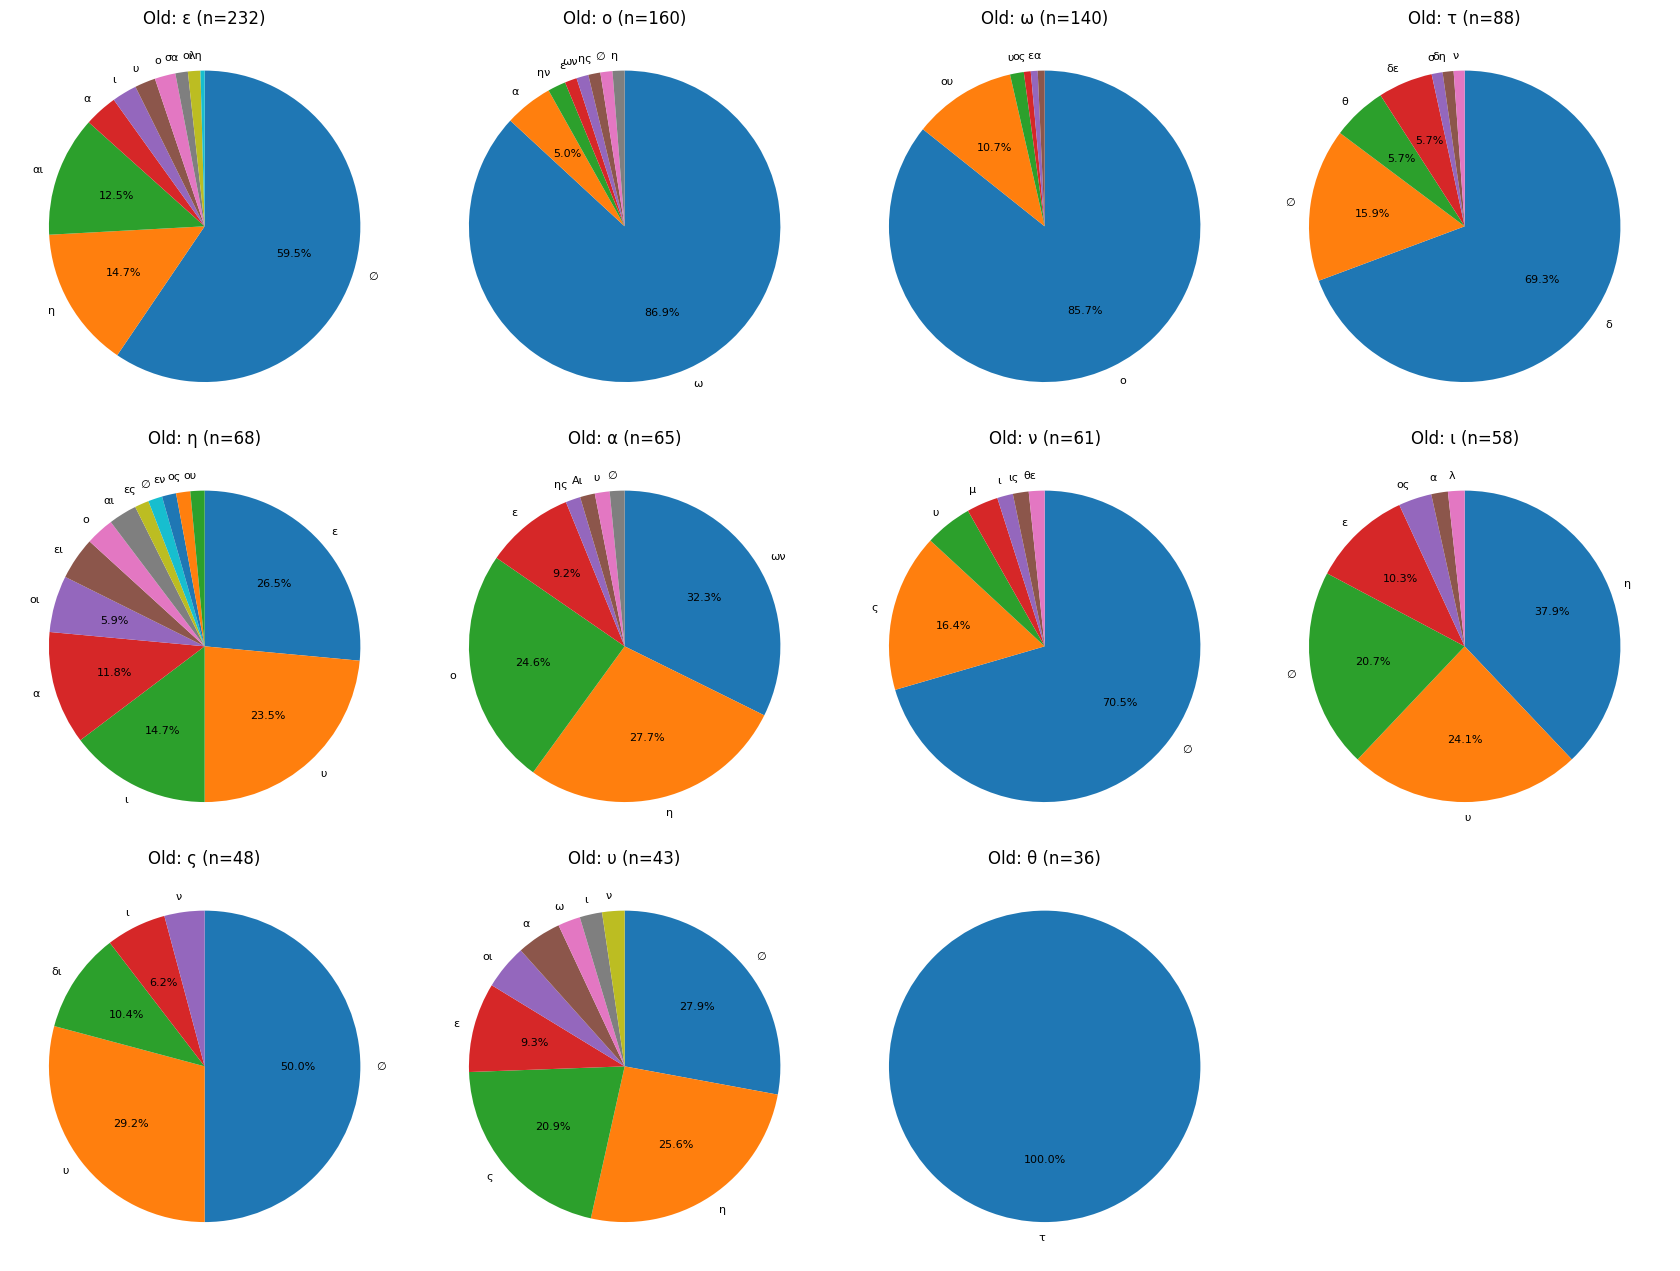

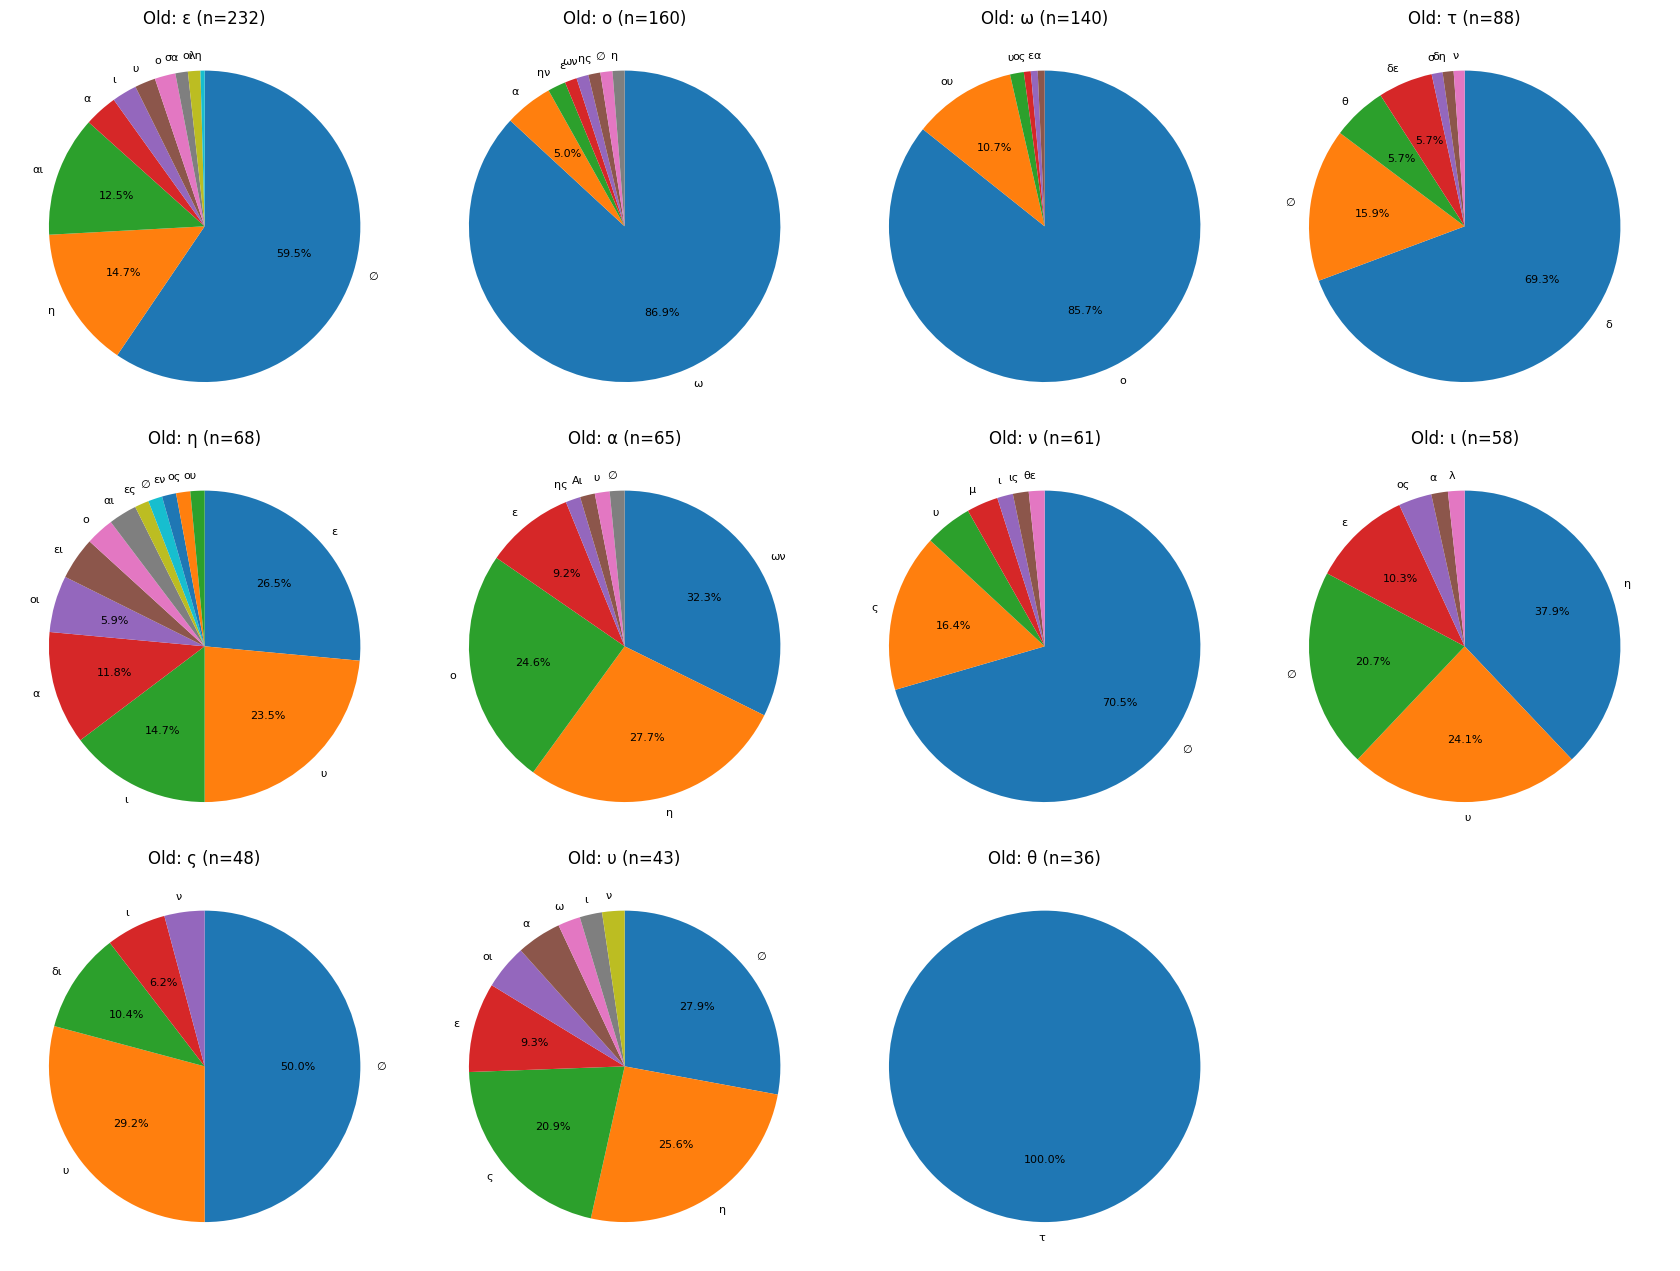

In [ ]:
#@title Visualisation du test 1

import math
import re
from typing import List

import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots


# Greek + Greek Extended blocks (covers most polytonic precomposed letters too)
_GREEK_CHAR_RE = re.compile(r"^[\u0370-\u03FF\u1F00-\u1FFF]$")

def is_single_greek_grapheme(x: object) -> bool:
    s = "" if x is None else str(x)
    return len(s) == 1 and bool(_GREEK_CHAR_RE.match(s))


# Keep only "grapheme-level" edits: single-character Old graphemes (Greek), non-empty
grapheme_edits = sound_change_df.loc[
    sound_change_df["Old"].map(is_single_greek_grapheme),
    ["Old", "New"],
].copy()

# Count how many times each Classical Greek grapheme (Old) was modified
old_counts = grapheme_edits["Old"].value_counts()

# Graphemes modified > 30 times
modified_gt_30 = old_counts[old_counts > 30]
graphemes_gt_30: List[str] = modified_gt_30.index.tolist()

print("Graphemes modified more than 30 times:")
print(modified_gt_30)

# Pie charts: for each Old grapheme, show distribution of its New forms
# (include insertions to multiple chars; deletions shown as '∅')
def plot_new_forms_pies(edits_df: pd.DataFrame, graphemes: List[str]):
    if not graphemes:
        raise ValueError("No graphemes found with count > 30 (nothing to plot).")

    n = len(graphemes)
    ncols = min(4, n)
    nrows = math.ceil(n / ncols)

    fig, axes = subplots(
        nrows=nrows,
        ncols=ncols,
        figsize=(4.2 * ncols, 4.2 * nrows),
        constrained_layout=True,
    )

    # Robust flatten (matplotlib returns Axes or ndarray depending on shape)
    if isinstance(axes, np.ndarray):
        ax_list = axes.ravel().tolist()
    else:
        ax_list = [axes]

    for i, old_g in enumerate(graphemes):
        ax = ax_list[i]
        sub = edits_df[edits_df["Old"] == old_g].copy()

        # Label deletions (empty new string)
        sub["New"] = sub["New"].fillna("").replace({"": "∅"})

        new_counts = sub["New"].value_counts()

        ax.pie(
            new_counts.values,
            labels=new_counts.index.tolist(),
            autopct=lambda p: f"{p:.1f}%" if p >= 5 else "",  # reduce label clutter
            startangle=90,
            counterclock=False,
            textprops={"fontsize": 8},
        )
        ax.set_title(f"Old: {old_g} (n={len(sub)})")

    # Turn off any unused subplot axes
    for j in range(n, len(ax_list)):
        ax_list[j].axis("off")

    return fig


fig = plot_new_forms_pies(grapheme_edits, graphemes_gt_30)
fig

Qui dit échantillon plus grand dit résultats plus solides.
Or, il semble que les données de la colonne 'Text Irregularities' du fichier originel soient tout à fait pertinentes.

In [ ]:
import pandas as pd
import difflib
import ast

df = pd.read_csv('/content/papyrus_corpus_cleaned.csv')

results = []
for cell in df['Text Irregularities'].dropna():
    try:
        items = ast.literal_eval(str(cell))
    except (ValueError, SyntaxError):
        continue

    if not isinstance(items, list):
        continue

    for item in items:
        if isinstance(item, str) and ': read ' in item:
            A, B = item.split(': read ', 1)
            results.extend(delta(A.strip(), B.strip()))

# Creation du DataFrame
sound_change_df = pd.DataFrame(results, columns=['Old', 'New'])

Cette fonction basée sur la [Distance de Levenshtein](https://fr.wikipedia.org/wiki/Distance_de_Levenshtein) (nombre minimal d'opérations pour passer d'un mot à l'autre) semble mieux cibler les erreurs scribales.

Graphemes modified more than 30 times:
Old
ε    230
ο    129
ω    104
τ     82
ι     82
α     65
η     51
υ     51
ν     39
θ     36
Name: count, dtype: int64


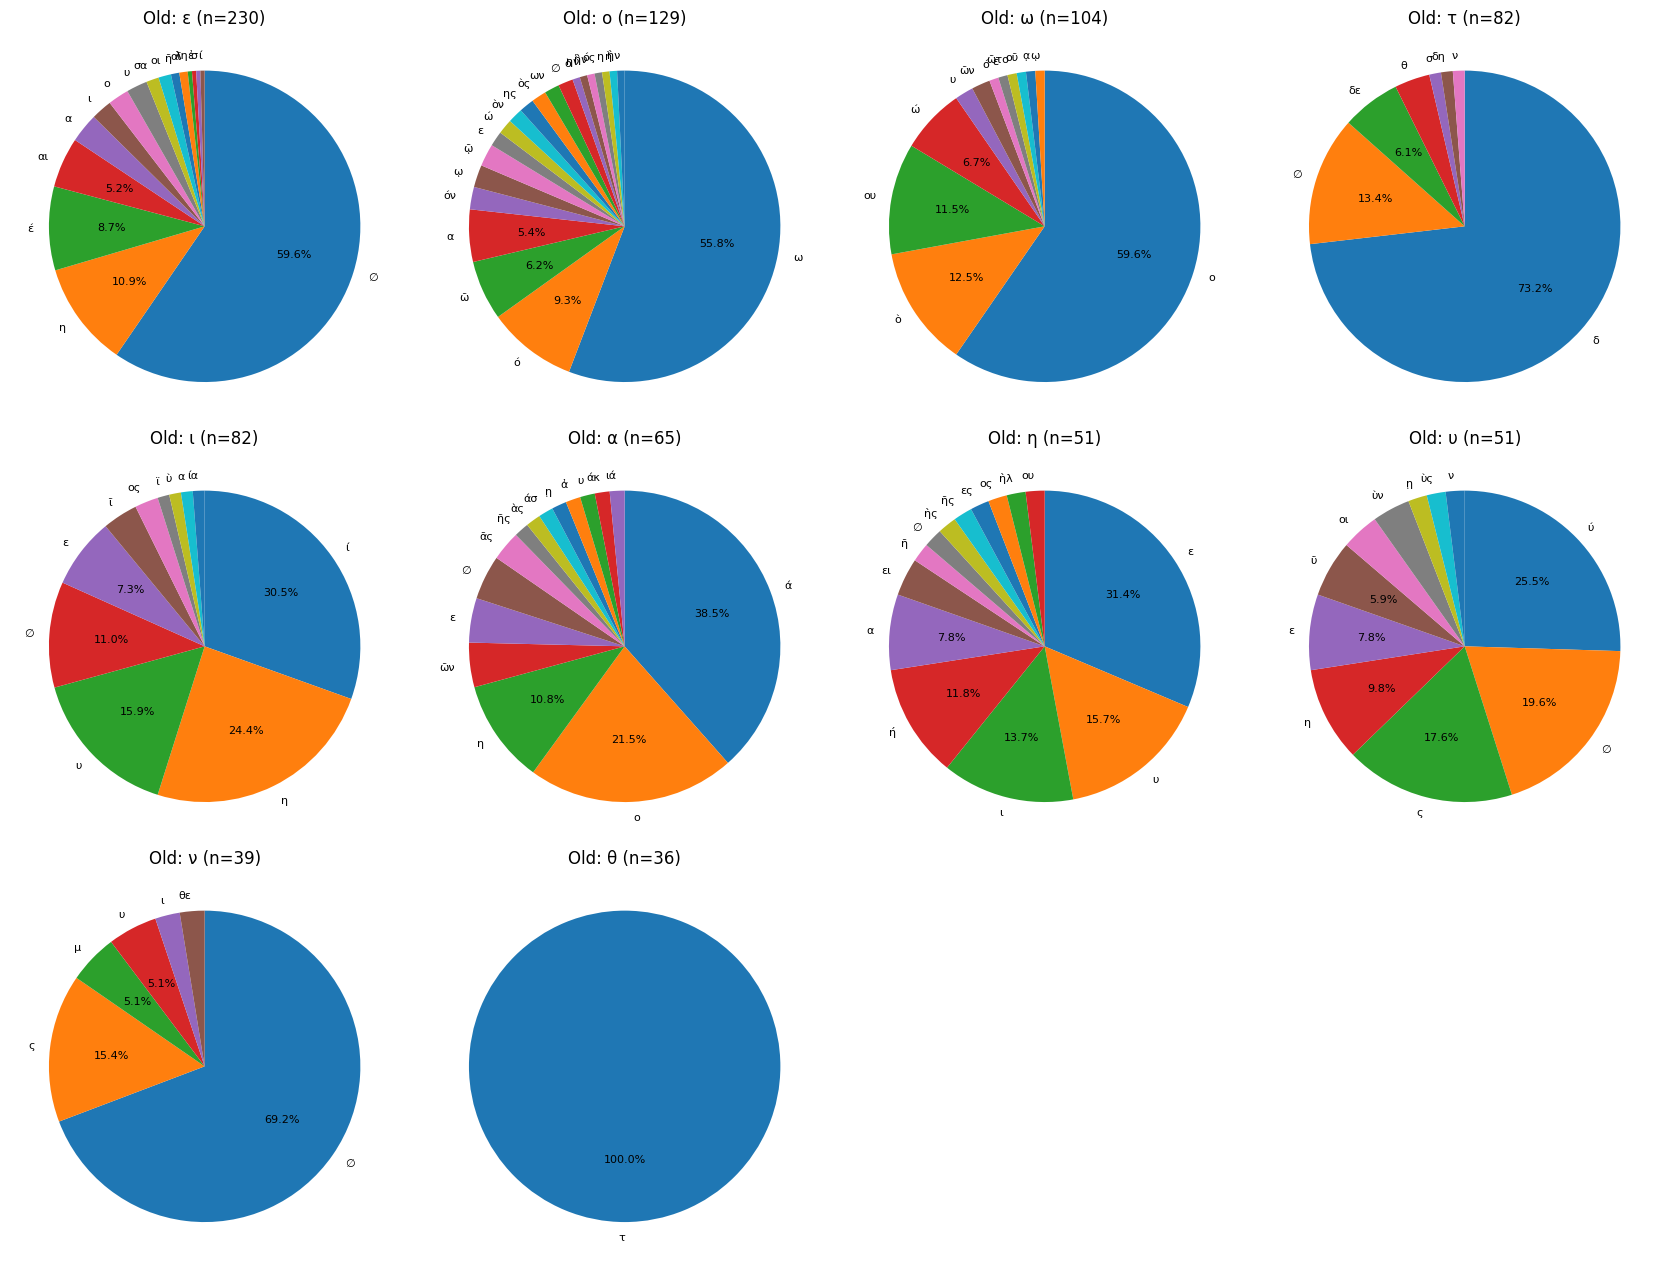

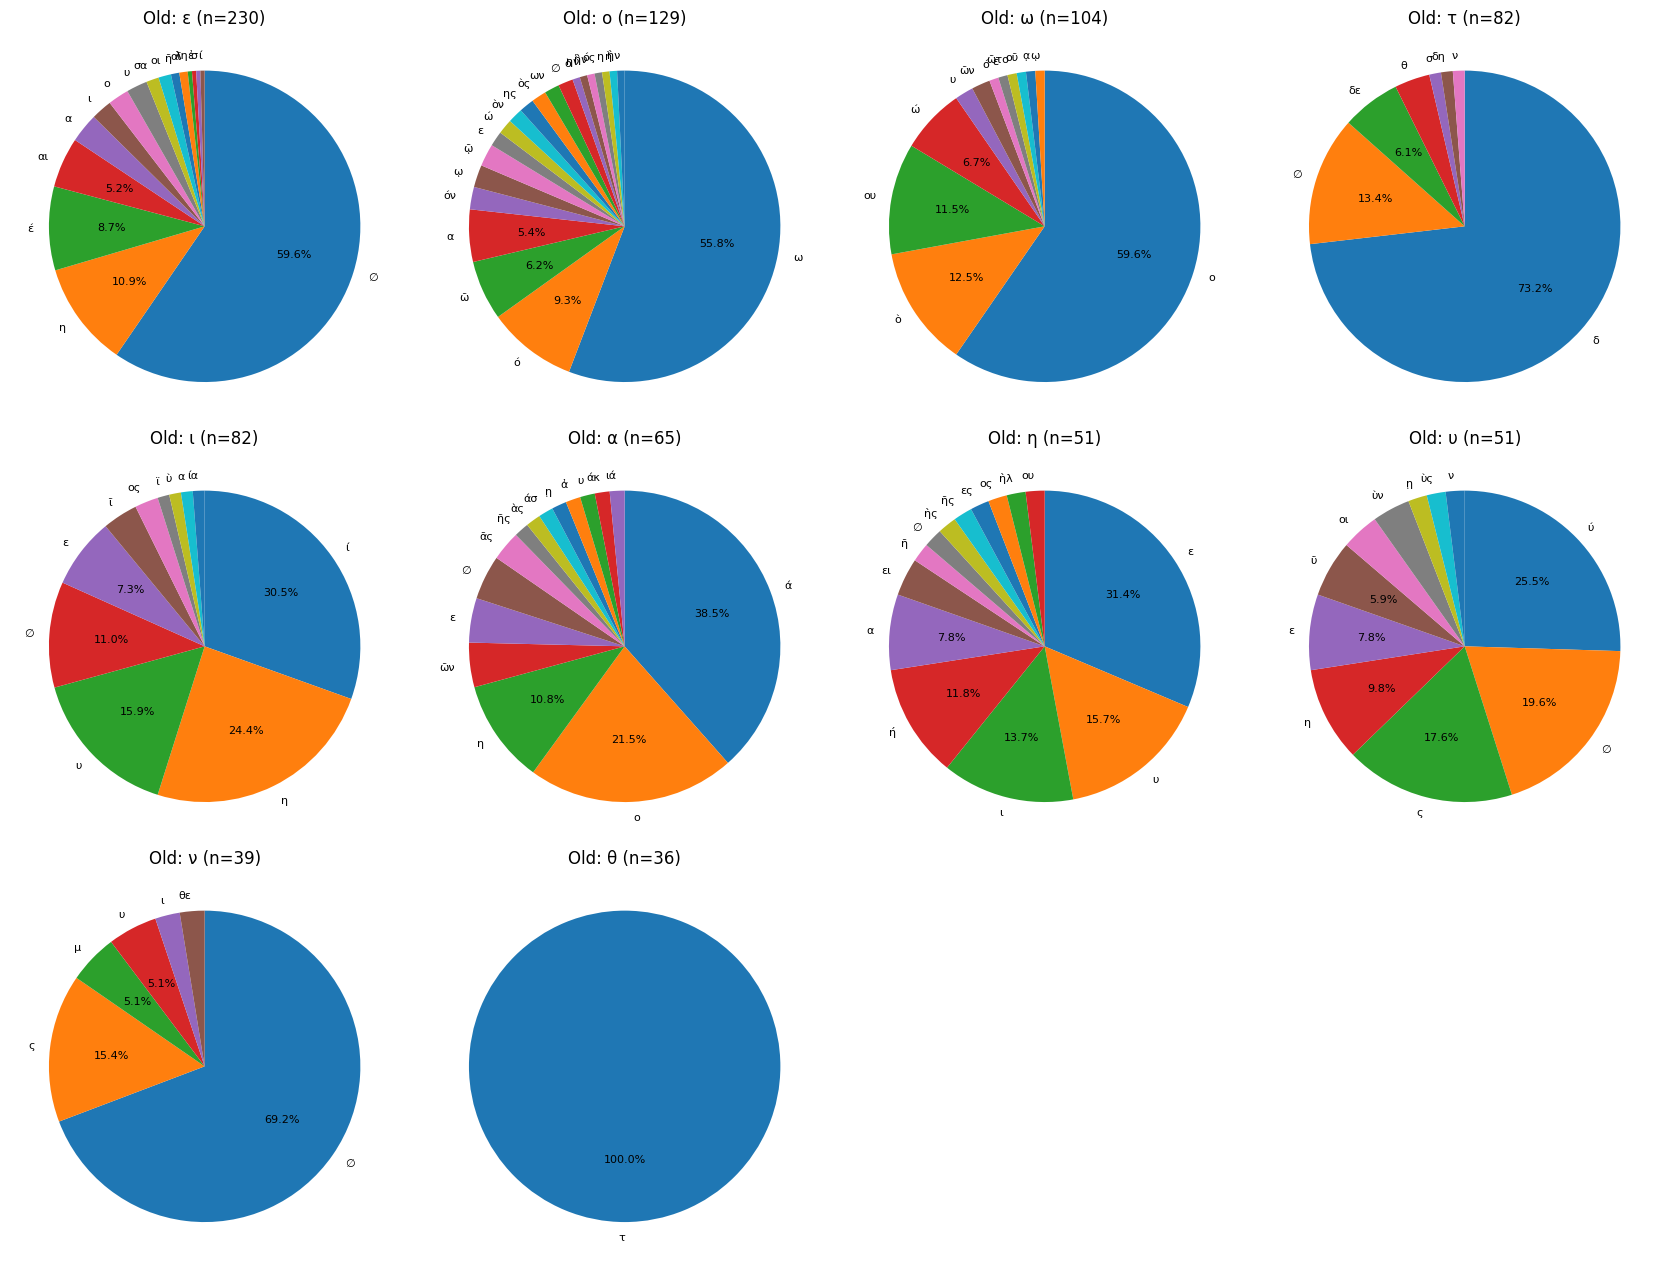

In [ ]:
#@title Visualisation du test sur corpus brut

import math
import re
from typing import List

import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots


# Greek + Greek Extended blocks (covers most polytonic precomposed letters too)
_GREEK_CHAR_RE = re.compile(r"^[\u0370-\u03FF\u1F00-\u1FFF]$")

def is_single_greek_grapheme(x: object) -> bool:
    s = "" if x is None else str(x)
    return len(s) == 1 and bool(_GREEK_CHAR_RE.match(s))


# Keep only "grapheme-level" edits: single-character Old graphemes (Greek), non-empty
grapheme_edits = sound_change_df.loc[
    sound_change_df["Old"].map(is_single_greek_grapheme),
    ["Old", "New"],
].copy()

# Count how many times each Classical Greek grapheme (Old) was modified
old_counts = grapheme_edits["Old"].value_counts()

# Graphemes modified > 30 times
modified_gt_30 = old_counts[old_counts > 30]
graphemes_gt_30: List[str] = modified_gt_30.index.tolist()

print("Graphemes modified more than 30 times:")
print(modified_gt_30)

# Pie charts: for each Old grapheme, show distribution of its New forms
# (include insertions to multiple chars; deletions shown as '∅')
def plot_new_forms_pies(edits_df: pd.DataFrame, graphemes: List[str]):
    if not graphemes:
        raise ValueError("No graphemes found with count > 30 (nothing to plot).")

    n = len(graphemes)
    ncols = min(4, n)
    nrows = math.ceil(n / ncols)

    fig, axes = subplots(
        nrows=nrows,
        ncols=ncols,
        figsize=(4.2 * ncols, 4.2 * nrows),
        constrained_layout=True,
    )

    # Robust flatten (matplotlib returns Axes or ndarray depending on shape)
    if isinstance(axes, np.ndarray):
        ax_list = axes.ravel().tolist()
    else:
        ax_list = [axes]

    for i, old_g in enumerate(graphemes):
        ax = ax_list[i]
        sub = edits_df[edits_df["Old"] == old_g].copy()

        # Label deletions (empty new string)
        sub["New"] = sub["New"].fillna("").replace({"": "∅"})

        new_counts = sub["New"].value_counts()

        ax.pie(
            new_counts.values,
            labels=new_counts.index.tolist(),
            autopct=lambda p: f"{p:.1f}%" if p >= 5 else "",  # reduce label clutter
            startangle=90,
            counterclock=False,
            textprops={"fontsize": 8},
        )
        ax.set_title(f"Old: {old_g} (n={len(sub)})")

    # Turn off any unused subplot axes
    for j in range(n, len(ax_list)):
        ax_list[j].axis("off")

    return fig


fig = plot_new_forms_pies(grapheme_edits, graphemes_gt_30)
fig